In [3]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import LogLocator, ScalarFormatter
from matplotlib.ticker import FixedLocator, ScalarFormatter
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib.legend_handler import HandlerTuple
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython
import imgkit
import scipy.special

# Neat CNF Suspensions 
Concentration dependence at 65.1degree
Data from 7/13


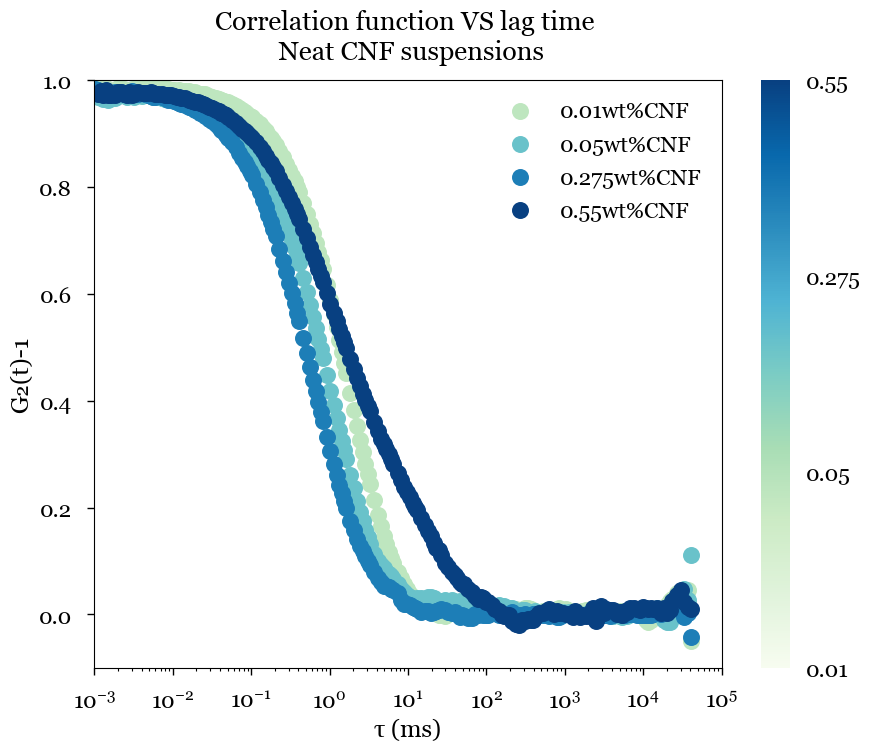

In [224]:
# Neat CNF Suspensions at 65.1 degree, 20C, 2D Autocorrelation
# Import Correlation Function data 
cnf001 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/0.01CNF/Measurement 1/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])

cnf005 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230531/0.05CNF0mMNaCl/Measurement 1/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])

cnf0275 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230630/0.275CNF/0.275CNF0mMNaCl/Measurement 2/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])

cnf055 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/0.55CNF/Measurement 1/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf001 = cnf001.iloc[28:,0]
lagtime_cnf001_ms = lagtime_cnf001  * 1000
corrfx_cnf001 = cnf001.iloc[28:,1]

lagtime_cnf005 = cnf005.iloc[28:,0]
lagtime_cnf005_ms = lagtime_cnf005 * 1000
corrfx_cnf005 = cnf005.iloc[28:,1]

lagtime_cnf0275 = cnf0275.iloc[28:,0]
lagtime_cnf0275_ms = lagtime_cnf0275  * 1000
corrfx_cnf0275 = cnf0275.iloc[28:,1]

lagtime_cnf055 = cnf055.iloc[28:,0]
lagtime_cnf055_ms = lagtime_cnf055  * 1000
corrfx_cnf055 = cnf055.iloc[28:,1]

lagtime_neatCNF = [lagtime_cnf001_ms, lagtime_cnf005_ms, lagtime_cnf0275_ms, lagtime_cnf055_ms]
corrfx_neatCNF = [corrfx_cnf001, corrfx_cnf005, corrfx_cnf0275, corrfx_cnf055]
label_neatCNF = ['0.01wt%CNF', '0.05wt%CNF', '0.275wt%CNF', '0.55wt%CNF']
conc_neatCNF = [0.01, 0.05, 0.275,  0.55]

cmap = plt.get_cmap('GnBu')
start_index = 1.2

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x, y, label) in enumerate(zip(lagtime_neatCNF, corrfx_neatCNF, label_neatCNF)):
    c = cmap(float(idx + start_index) / len(lagtime_neatCNF))
    scatter1 = ax.scatter(x, y,marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

# Add a colorbar that matches the colormap
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.outline.set_visible(False)

# Set custom tick labels on the colorbar
ticks = np.linspace(0, 1, len(conc_neatCNF))
tick_labels = conc_neatCNF
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)

plt.style.use('seaborn-poster')
plt.xscale("log")
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')  
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time \n Neat CNF suspensions', pad=15)
#plt.savefig("Correlation function VS lag time Neat CNF suspensions (1.5mmolPg) 2DAuto 65.1deg.png", dpi=1500, bbox_inches='tight',  transparent=True)
#plt.savefig("Correlation function VS lag time Neat CNF suspensions (1.5mmol COONa) 2DAuto 65.1deg.png", dpi=1500, bbox_inches='tight')
plt.show()

In [225]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf001 = lagtime_cnf001_ms
g_t_cnf001 = corrfx_cnf001
t_cnf005 = lagtime_cnf005_ms
g_t_cnf005 = corrfx_cnf005
t_cnf0275 = lagtime_cnf0275_ms
g_t_cnf0275 = corrfx_cnf0275
t_cnf055 = lagtime_cnf055_ms
g_t_cnf055 = corrfx_cnf055

p0 = [1, 1,1]

# Set the parameter bounds
bounds = ([0, 0.001, 0], [1, 100000, 1])

params_cnf001, cov_cnf001 = curve_fit(g, t_cnf001, g_t_cnf001, p0, bounds=bounds)
A_fit_cnf001, tau_fit_cnf001, beta_fit_cnf001 = params_cnf001

params_cnf005, cov_cnf005 = curve_fit(g, t_cnf005, g_t_cnf005, p0, bounds=bounds)
A_fit_cnf005, tau_fit_cnf005, beta_fit_cnf005 = params_cnf005

params_cnf0275, cov_cnf0275 = curve_fit(g, t_cnf0275, g_t_cnf0275, p0, bounds=bounds)
A_fit_cnf0275, tau_fit_cnf0275, beta_fit_cnf0275 = params_cnf0275

params_cnf055, cov_cnf055 = curve_fit(g, t_cnf055, g_t_cnf055, p0, bounds=bounds)
A_fit_cnf055, tau_fit_cnf055, beta_fit_cnf055 = params_cnf055
    
# Table using DataFrame
samples_neatCNF = ['0.01wt.% CNF', '0.05wt.% CNF', '0.275wt.% CNF', '0.55wt.% CNF']
A_fitted_neatCNF = [A_fit_cnf001, A_fit_cnf005, A_fit_cnf0275, A_fit_cnf055]
t_fitted_neatCNF = [tau_fit_cnf001, tau_fit_cnf005, tau_fit_cnf0275, tau_fit_cnf055]
beta_fitted_neatCNF =  [beta_fit_cnf001, beta_fit_cnf005, beta_fit_cnf0275, beta_fit_cnf055]

# mean tau calculations
meantau_neatCNF_name = ["meantau_0.01wt.%CNF", "meantau_0.05wt.%CNF", "meantau_0.275wt.%CNF", "meantau_0.55wt.%CNF"]
meantau_neatCNFs = {}
for i in range(len(t_fitted_neatCNF)):
    meantau_neatCNF = (t_fitted_neatCNF[i]/beta_fitted_neatCNF[i])*scipy.special.gamma(1/beta_fitted_neatCNF[i])
    name = meantau_neatCNF_name[i]
    meantau_neatCNFs[name] = meantau_neatCNF

meantau_neatCNF = np.array(list(meantau_neatCNFs.values()))

table_Parameters_neatCNF = {
    '': samples_neatCNF,
    'A' : A_fitted_neatCNF,
    '\u03C4 (ms)': t_fitted_neatCNF,
    '\u03B2': beta_fitted_neatCNF,
    '<\u03C4> (ms)': meantau_neatCNF
}

table_Parameters_neatCNF_draw = pd.DataFrame(table_Parameters_neatCNF)

styled_table_Parameters_neatCNF_draw = table_Parameters_neatCNF_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='GnBu') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.3f}', '\u03B2': '{:.3f}', '<\u03C4> (ms)': '{:.2f}'})\
    .hide(axis='index')

styled_table_Parameters_neatCNF_draw           


,A,τ (ms),β,<τ> (ms)
0.01wt.% CNF,0.992,2.241,0.853,2.43
0.05wt.% CNF,0.986,1.317,0.770,1.53
0.275wt.% CNF,0.997,0.863,0.734,1.05
0.55wt.% CNF,1.000,4.153,0.511,7.98


In [226]:
# Save the styled table method 1
# Convert styled DataFrame to HTML table
html_styled_table_Parameters_neatCNF = styled_table_Parameters_neatCNF_draw.to_html()

# Save the HTML table to a temporary file
with open('temp.html', 'w') as f:
    f.write(html_styled_table_Parameters_neatCNF)
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 2,
   # 'width': 1200,  # A djust the width and height as needed
   # 'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}
# Save the HTML table as a PNG image
#imgkit.from_file('temp.html', 'Table of Fitted Parameters for Neat CNF Suspensions (1.5mmol COONa).png', options=options)

True

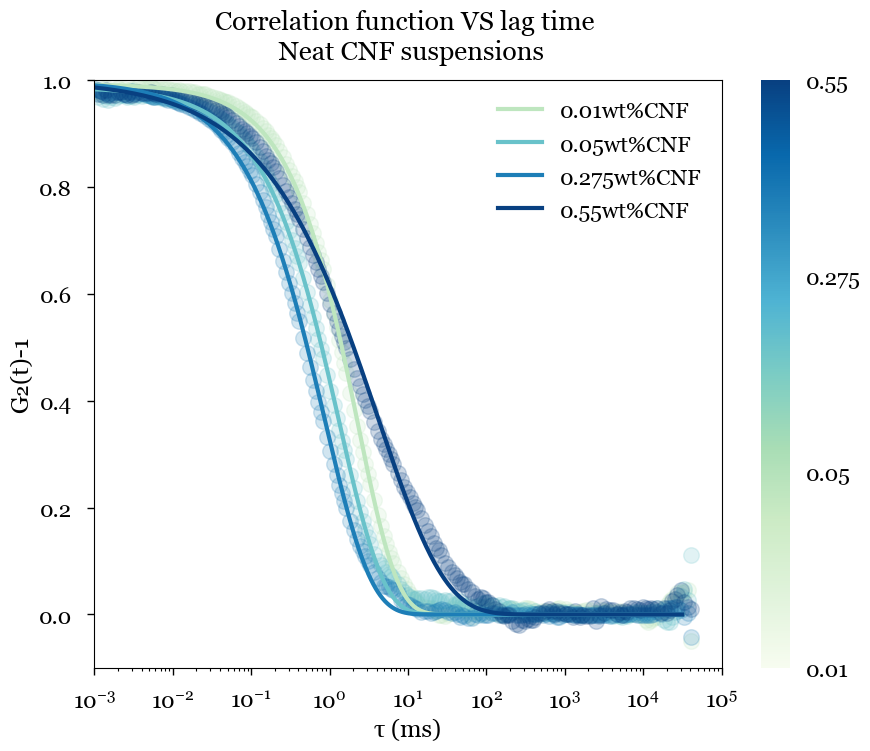

In [227]:
# Plot the fitting

t_fit_cnf001 = np.logspace(-3, 4.5, 1000)
g_fit_cnf001 = g(t_fit_cnf001, A_fit_cnf001, tau_fit_cnf001, beta_fit_cnf001)

t_fit_cnf005 = np.logspace(-3, 4.5, 1000)
g_fit_cnf005 = g(t_fit_cnf005, A_fit_cnf005, tau_fit_cnf005, beta_fit_cnf005)

t_fit_cnf0275 = np.logspace(-3, 4.5, 1000)
g_fit_cnf0275 = g(t_fit_cnf0275, A_fit_cnf0275, tau_fit_cnf0275, beta_fit_cnf0275)

t_fit_cnf055 = np.logspace(-3, 4.5, 1000)
g_fit_cnf055 = g(t_fit_cnf055, A_fit_cnf055, tau_fit_cnf055, beta_fit_cnf055)

t_fit_neatCNF = [t_fit_cnf001, t_fit_cnf005, t_fit_cnf0275, t_fit_cnf055]
g_fit_neatCNF = [g_fit_cnf001, g_fit_cnf005, g_fit_cnf0275, g_fit_cnf055]

cmap = plt.get_cmap('GnBu')
start_index = 1.2

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x1, y1, x2, y2, label) in enumerate(zip(lagtime_neatCNF, corrfx_neatCNF, t_fit_neatCNF, g_fit_neatCNF, label_neatCNF)):
    c = cmap(float(idx + start_index) / len(lagtime_neatCNF))
    scatter1 = ax.scatter(x1, y1, marker='o', facecolors=c, edgecolors=c, alpha=0.2, linewidths=1)
    fitting = ax.semilogx(x2, y2, linestyle='solid', color = c, linewidth=3, label=label)

# Add a colorbar that matches the colormap
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.outline.set_visible(False)

# Set custom tick labels on the colorbar
ticks = np.linspace(0, 1, len(conc_neatCNF))
tick_labels = conc_neatCNF
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)

plt.style.use('seaborn-poster')
plt.xscale("log")
plt.rcParams['font.family'] = 'Georgia'
plt.xlabel('\u03C4 (ms)')
plt.ylabel('G\u2082(t)-1')  
plt.legend(frameon=False)
plt.tick_params(axis='y', length=5, width=1, color='black', direction='out')
plt.tick_params(axis='x', length=5, width=1, color='black', direction='out')
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time \n Neat CNF suspensions', pad=15)
#plt.savefig("Correlation function VS lag time Neat CNF suspensions 2DAuto 65.1deg fit.png", dpi=1500, bbox_inches='tight', transparent=True)
#plt.savefig("Correlation function VS lag time Neat CNF suspensions 2DAuto 65.1deg fit wbg.png", dpi=1500, bbox_inches='tight')
plt.show()

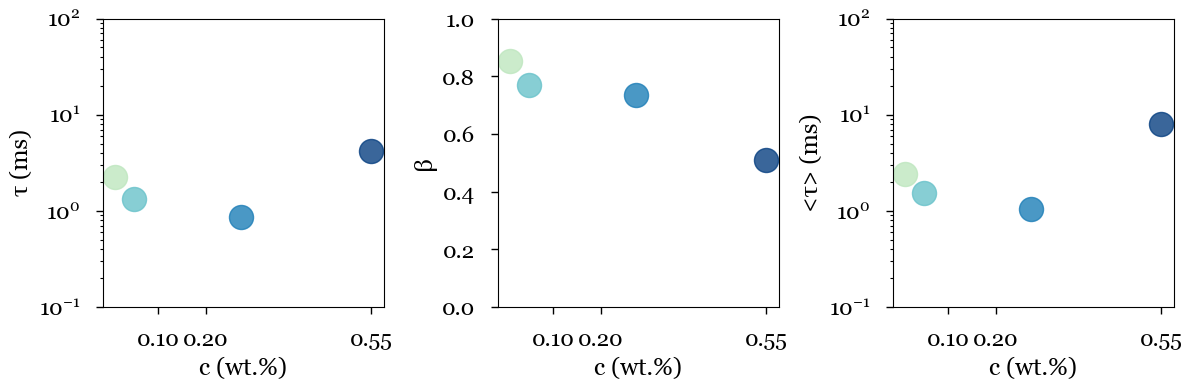

In [239]:
cmap = plt.get_cmap('GnBu')
start_index = 1.2

plt.style.use('_mpl-gallery-nogrid')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x, y1, y2, y3, label) in enumerate(zip(cnf_conc, tau_neatCNF, beta_neatCNF, meantau_neatCNF, label_neatCNF)):
    c = cmap(float(idx + start_index) / len(cnf_conc))
    scatter1 = axes[0].scatter(x, y1, marker='o', s=300, alpha=0.8, facecolors=c, edgecolors=c, linewidths=1, label=label)
    scatter2 = axes[1].scatter(x, y2, marker='o', s=300, alpha=0.8, facecolors=c, edgecolors=c, linewidths=1, label=label)
    scatter3 = axes[2].scatter(x, y3, marker='o', s=300, alpha=0.8, facecolors=c, edgecolors=c, linewidths=1, label=label)
    
axes[0].set_xlabel('c (wt.%)')
axes[0].set_ylabel('\u03C4 (ms)')
#axes[0].set_ylim(1, 6)
axes[0].set_ylim(0.1, 100)
axes[0].set_yscale("log")
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[0].set_xticks([0.1, 0.2, 0.55])
#axes[0].set_xticks([0, 0.25, 0.5])
#axes[0].set_yticks([1, 3, 5, 6])

axes[1].set_xlabel('c (wt.%)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0, 1)
axes[1].set_xticks([0.1, 0.2, 0.55])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')

axes[2].set_xlabel('c (wt.%)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,100)
axes[2].set_xticks([0.1, 0.2, 0.55])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameter as a function of CNF concentration for Neat CNF suspensions 2DAuto 65.1deg.png", dpi=1500, bbox_inches='tight')
plt.show()

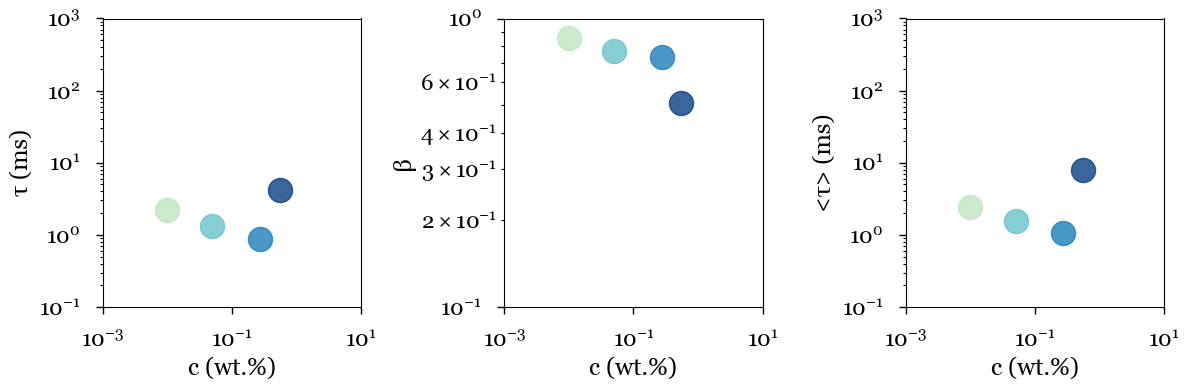

In [240]:
cnf_conc = [0.01, 0.05, 0.275, 0.55]
beta_neatCNF = np.array([beta_fit_cnf001, beta_fit_cnf005, beta_fit_cnf0275, beta_fit_cnf055])
tau_neatCNF = np.array([tau_fit_cnf001, tau_fit_cnf005, tau_fit_cnf0275, tau_fit_cnf055])

cmap = plt.get_cmap('GnBu')
start_index = 1.2

plt.style.use('_mpl-gallery-nogrid')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x, y1, y2, y3, label) in enumerate(zip(cnf_conc, tau_neatCNF, beta_neatCNF, meantau_neatCNF, label_neatCNF)):
    c = cmap(float(idx + start_index) / len(cnf_conc))
    scatter1 = axes[0].scatter(x, y1, marker='o', s=300, alpha=0.8, facecolors=c, edgecolors=c, linewidths=1, label=label)
    scatter2 = axes[1].scatter(x, y2, marker='o', s=300, alpha=0.8, facecolors=c, edgecolors=c, linewidths=1, label=label)
    scatter3 = axes[2].scatter(x, y3, marker='o', s=300, alpha=0.8, facecolors=c, edgecolors=c, linewidths=1, label=label)
    
axes[0].set_xlabel('c (wt.%)')
axes[0].set_ylabel('\u03C4 (ms)')
#axes[0].set_ylim(1, 6)
axes[0].set_ylim(0.1, 1000)
axes[0].set_xlim(0.001,10)
axes[0].set_yscale("log")
axes[0].set_xscale("log")
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[0].set_xticks([0.1, 0.2, 0.55])
#axes[0].set_xticks([0, 0.25, 0.5])
#axes[0].set_yticks([1, 3, 5, 6])

axes[1].set_xlabel('c (wt.%)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1, 1)
axes[1].set_xlim(0.001,10)
#axes[1].set_xticks([0.1, 0.2, 0.55])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")
axes[1].set_xscale("log")

axes[2].set_xlabel('c (wt.%)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_xlim(0.001,10)
axes[2].set_ylim(0.1,1000)
#axes[2].set_xticks([0.1, 0.2, 0.55])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_yscale("log")
axes[2].set_xscale("log")

plt.tight_layout()
#plt.savefig("Parameter as a function of CNF concentration for Neat CNF suspensions 2DAuto 65.1deg loglog.png", dpi=1500, bbox_inches='tight')
plt.show()

# Ion Specificity
All conducted at 90degree

# 0.01CNF (1.5mmol COONa)

In [14]:
cnf001_110_150 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/0.01CNF(1.5mmol)_0mM/Measurement 5/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])

# LiCl

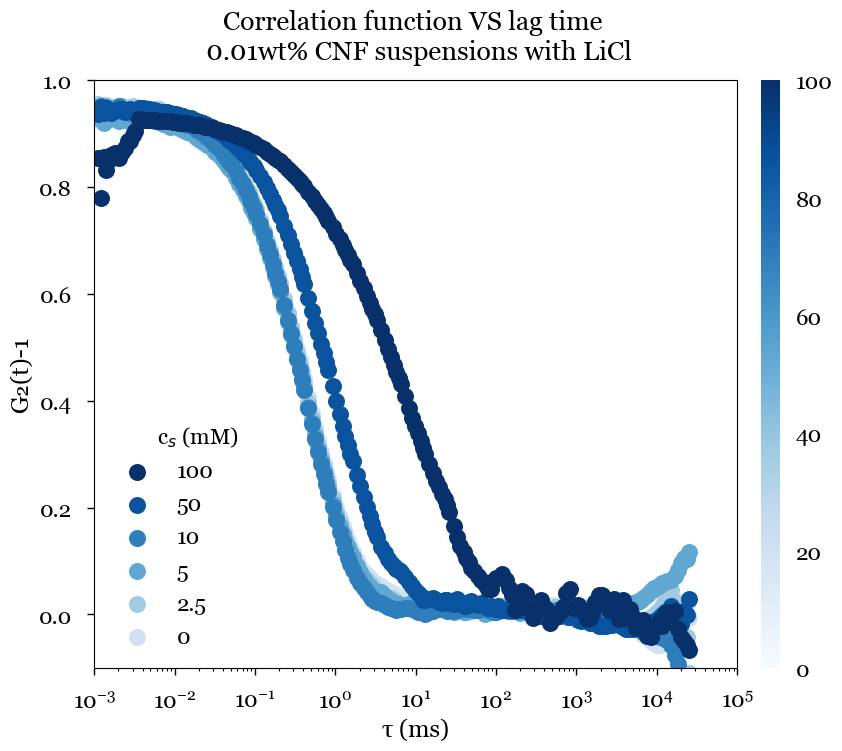

In [242]:
# Import Correlation Function data 
cnf001_110_150_025licl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/LICl/0.01CNF(1.5mmol)_2.5mMLiCl/Measurement 5/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_050licl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/LICl/0.01CNF(1.5mmol)_5mMLiCl/Measurement 5/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_100licl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/LICl/0.01CNF(1.5mmol)_10mMLiCl/Measurement 5/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_500licl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/LICl/0.01CNF(1.5mmol)_50mMLiCl/Measurement 5/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_1000licl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/LICl/0.01CNF(1.5mmol)_100mMLiCl/Measurement 5/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf001_110_150_0licl = cnf001_110_150.iloc[28:,0]
lagtime_cnf001_110_150_0licl_ms = lagtime_cnf001_110_150_0licl*1000
corrfx_cnf001_110_150_0licl = cnf001_110_150.iloc[28:,1]

lagtime_cnf001_110_150_025licl = cnf001_110_150_025licl.iloc[28:,0]
lagtime_cnf001_110_150_025licl_ms = lagtime_cnf001_110_150_025licl*1000
corrfx_cnf001_110_150_025licl = cnf001_110_150_025licl.iloc[28:,1]

lagtime_cnf001_110_150_050licl = cnf001_110_150_050licl.iloc[28:,0]
lagtime_cnf001_110_150_050licl_ms = lagtime_cnf001_110_150_050licl*1000
corrfx_cnf001_110_150_050licl = cnf001_110_150_050licl.iloc[28:,1]

lagtime_cnf001_110_150_100licl = cnf001_110_150_100licl.iloc[28:,0]
lagtime_cnf001_110_150_100licl_ms = lagtime_cnf001_110_150_100licl*1000
corrfx_cnf001_110_150_100licl = cnf001_110_150_100licl.iloc[28:,1]

lagtime_cnf001_110_150_500licl = cnf001_110_150_500licl.iloc[28:,0]
lagtime_cnf001_110_150_500licl_ms = lagtime_cnf001_110_150_500licl*1000
corrfx_cnf001_110_150_500licl = cnf001_110_150_500licl.iloc[28:,1]

lagtime_cnf001_110_150_1000licl = cnf001_110_150_1000licl.iloc[28:,0]
lagtime_cnf001_110_150_1000licl_ms = lagtime_cnf001_110_150_1000licl*1000
corrfx_cnf001_110_150_1000licl = cnf001_110_150_1000licl.iloc[28:,1]

t_cnf001_110_150_licl_all = [lagtime_cnf001_110_150_0licl_ms, lagtime_cnf001_110_150_025licl_ms, lagtime_cnf001_110_150_050licl_ms,
                   lagtime_cnf001_110_150_100licl_ms, lagtime_cnf001_110_150_500licl_ms, lagtime_cnf001_110_150_1000licl_ms]
g_cnf001_110_150_licl_all = [corrfx_cnf001_110_150_0licl, corrfx_cnf001_110_150_025licl, corrfx_cnf001_110_150_050licl,
                   corrfx_cnf001_110_150_100licl, corrfx_cnf001_110_150_500licl, corrfx_cnf001_110_150_1000licl]
label_110_150 = [0, 2.5, 5, 10, 50, 100]
#label_110_150 = ['0mM NaCl', '2.5mM NaCl', '5mM NaCl',
#                '10mM NaCl', '50mM NaCl', '100mM NaCl']
#__________________________________________________________________________________________________
# Create a colormap
cmap_licl = plt.get_cmap('Blues')
start_index_licl = 1.2

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x, y, label) in enumerate(zip(t_cnf001_110_150_licl_all, g_cnf001_110_150_licl_all, label_110_150)):
    c = cmap_licl(float(idx + start_index_licl) / len(t_cnf001_110_150_licl_all))
    scatter1 = ax.scatter(x, y, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
   # scatter1.set_facecolor('none')
#__________________________________________________________________________________________________

# Add a colorbar that matches the colormap
salt_conc001_110_150_licl_all = label_110_150

# Calculate the overall minimum and maximum values for the colorbar
min_value = min(np.min(salt_conc001_110_150_licl_all[i]) for i in range(len(salt_conc001_110_150_licl_all)))
max_value = max(np.max(salt_conc001_110_150_licl_all[i]) for i in range(len(salt_conc001_110_150_licl_all)))

# Add a colorbar that matches the colormap and scales to the actual values
sm = plt.cm.ScalarMappable(cmap=cmap_licl, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

# Create the colorbar with the actual value scale
cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)  # Adjust the pad and aspect values as per your preference
cbar.outline.set_visible(False)
#cbar.set_label('[NaCl] \n (mM)', rotation=0, labelpad=10)

#__________________________________________________________________________________________________
# Create the zoomed-inset axes with a different location
#ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper right')
# Plot the zoomed-in data
#for idx, (x, y) in enumerate(zip(t_cnf001_110_150_licl_all, g_cnf001_110_150_licl_all)):
#    c = cmap(float(idx) / len(t_cnf001_110_150_licl_all))
#    scatter1_zoom = ax_zoom.scatter(x, y, c=np.atleast_2d(c), s = 300,
#                                    marker='o', facecolors=c, edgecolors=c, linewidths=3)
    #scatter1_zoom.set_facecolor('none')

# Specify the limits of the zoomed-in region
#x1, x2, y1, y2 = 1, 3, 0.3, 0.5
#ax_zoom.set_xlim(x1, x2)
#ax_zoom.set_ylim(y1, y2)

# Set the x-axis tick positions for the zoomed-in axes 
#ax_zoom.set_xscale('log')
#xticks = [1, 2, 3]
#yticks = [0.3,0.4,0.5]
#ax_zoom.set_xticks(xticks)
#ax_zoom.set_xticklabels(xticks)
#ax_zoom.set_yticks(yticks)
#ax_zoom.set_yticklabels(yticks)
#ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out')
#ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out')

# Create a mark for the zoomed-in region
#mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

#__________________________________________________________________________________________________
# Get the handles and labels of the legend items
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of the handles and labels
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed handles and labels
ax.legend(handles, labels, loc='lower left', frameon=False)

ax.text(6E-3, 0.32, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.01wt% CNF suspensions with LiCl', pad=15)
#plt.savefig("Correlation function VS lag time 0.01wt% CNF suspensions (1.50mmol COONa) at 90deg LiCl.png", dpi=1500, bbox_inches='tight')
plt.show()

In [243]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf001_110_150_0licl = lagtime_cnf001_110_150_0licl_ms
g_t_cnf001_110_150_0licl = corrfx_cnf001_110_150_0licl
t_cnf001_110_150_025licl = lagtime_cnf001_110_150_025licl_ms
g_t_cnf001_110_150_025licl = corrfx_cnf001_110_150_025licl
t_cnf001_110_150_050licl = lagtime_cnf001_110_150_050licl_ms
g_t_cnf001_110_150_050licl = corrfx_cnf001_110_150_050licl
t_cnf001_110_150_100licl = lagtime_cnf001_110_150_100licl_ms
g_t_cnf001_110_150_100licl = corrfx_cnf001_110_150_100licl
t_cnf001_110_150_500licl = lagtime_cnf001_110_150_500licl_ms
g_t_cnf001_110_150_500licl = corrfx_cnf001_110_150_500licl
t_cnf001_110_150_1000licl = lagtime_cnf001_110_150_1000licl_ms
g_t_cnf001_110_150_1000licl = corrfx_cnf001_110_150_1000licl

p0 = [1, 1, 1]
# Set the parameter bounds
bounds = ([0, 0.0001, 0], [1, 10000, 1])

params_cnf001_110_150_0licl, cov_cnf001_110_150_0licl = curve_fit(g, t_cnf001_110_150_0licl, g_t_cnf001_110_150_0licl, p0, bounds=bounds)
A_fit_cnf001_110_150_0licl, tau_fit_cnf001_110_150_0licl, beta_fit_cnf001_110_150_0licl = params_cnf001_110_150_0licl

params_cnf001_110_150_025licl, cov_cnf001_110_150_025licl = curve_fit(g, t_cnf001_110_150_025licl, g_t_cnf001_110_150_025licl, p0, bounds=bounds)
A_fit_cnf001_110_150_025licl, tau_fit_cnf001_110_150_025licl, beta_fit_cnf001_110_150_025licl = params_cnf001_110_150_025licl

params_cnf001_110_150_050licl, cov_cnf001_110_150_050licl = curve_fit(g, t_cnf001_110_150_050licl, g_t_cnf001_110_150_050licl, p0, bounds=bounds)
A_fit_cnf001_110_150_050licl, tau_fit_cnf001_110_150_050licl, beta_fit_cnf001_110_150_050licl = params_cnf001_110_150_050licl

params_cnf001_110_150_100licl, cov_cnf001_110_150_100licl = curve_fit(g, t_cnf001_110_150_100licl, g_t_cnf001_110_150_100licl, p0, bounds=bounds)
A_fit_cnf001_110_150_100licl, tau_fit_cnf001_110_150_100licl, beta_fit_cnf001_110_150_100licl = params_cnf001_110_150_100licl

params_cnf001_110_150_500licl, cov_cnf001_110_150_500licl = curve_fit(g, t_cnf001_110_150_500licl, g_t_cnf001_110_150_500licl, p0, bounds=bounds)
A_fit_cnf001_110_150_500licl, tau_fit_cnf001_110_150_500licl, beta_fit_cnf001_110_150_500licl = params_cnf001_110_150_500licl

params_cnf001_110_150_1000licl, cov_cnf001_110_150_1000licl = curve_fit(g, t_cnf001_110_150_1000licl, g_t_cnf001_110_150_1000licl, p0, bounds=bounds)
A_fit_cnf001_110_150_1000licl, tau_fit_cnf001_110_150_1000licl, beta_fit_cnf001_110_150_1000licl = params_cnf001_110_150_1000licl

# Table using DataFrame
samples_001CNF_110_150_LiCl = ['0mM LiCl','2.5mM LiCl', '5mM LiCl', '10mM LiCl', '50mM LiCl', '100mM LiCl']
A_fitted_001CNF_110_150_LiCl = [A_fit_cnf001_110_150_0licl, A_fit_cnf001_110_150_025licl, A_fit_cnf001_110_150_050licl, A_fit_cnf001_110_150_100licl, A_fit_cnf001_110_150_500licl, A_fit_cnf001_110_150_1000licl]
t_fitted_001CNF_110_150_LiCl = [tau_fit_cnf001_110_150_0licl, tau_fit_cnf001_110_150_025licl, tau_fit_cnf001_110_150_050licl, tau_fit_cnf001_110_150_100licl, tau_fit_cnf001_110_150_500licl, tau_fit_cnf001_110_150_1000licl]
beta_fitted_001CNF_110_150_LiCl =  [beta_fit_cnf001_110_150_0licl, beta_fit_cnf001_110_150_025licl, beta_fit_cnf001_110_150_050licl, beta_fit_cnf001_110_150_100licl, beta_fit_cnf001_110_150_500licl, beta_fit_cnf001_110_150_1000licl]

# mean tau calculations
meantau_cnf001s_110_150_licl = ["meantau_0.01wt.%CNF_0mMlicl", "meantau_0.01wt.%CNF_2.5mMlicl", "meantau_0.01wt.%CNF_5mMlicl", "meantau_0.01wt.%CNF_10mMlicl", "meantau_0.01wt.%CNF_50mMlicl", "meantau_0.01wt.%CNF_100mMlicl"]
meantau_cnf001s_110_150_licl_r = {}
for i in range(len(t_fitted_001CNF_110_150_LiCl)):
    meantau_cnf001_110_150_licl = (t_fitted_001CNF_110_150_LiCl[i]/beta_fitted_001CNF_110_150_LiCl[i])*scipy.special.gamma(1/beta_fitted_001CNF_110_150_LiCl[i])
    name = meantau_cnf001s_110_150_licl[i]
    meantau_cnf001s_110_150_licl_r[name] = meantau_cnf001_110_150_licl
    
meantau_001CNF_110_150_licl = np.array(list(meantau_cnf001s_110_150_licl_r.values()))

table_Parameters_001CNF_110_150_LiCl = {
    '0.01wt.%CNF with': samples_001CNF_110_150_LiCl ,
    'A' : A_fitted_001CNF_110_150_LiCl,
    '\u03C4 (ms)': t_fitted_001CNF_110_150_LiCl,
    '\u03B2': beta_fitted_001CNF_110_150_LiCl,
    '<\u03C4> (ms)': meantau_001CNF_110_150_licl
}

table_Parameters_001CNF_110_150_LiCl_draw = pd.DataFrame(table_Parameters_001CNF_110_150_LiCl)

styled_table_Parameters_001CNF_110_150_LiCl_draw = table_Parameters_001CNF_110_150_LiCl_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Blues') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.2f}', '\u03B2': '{:.3f}', '<\u03C4> (ms)': '{:.2f}'})\
    .hide(axis='index')

styled_table_Parameters_001CNF_110_150_LiCl_draw           

0.01wt.%CNF with,A,τ (ms),β,<τ> (ms)
0mM LiCl,0.957,0.60,0.781,0.69
2.5mM LiCl,0.970,0.56,0.793,0.64
5mM LiCl,0.949,0.56,0.795,0.64
10mM LiCl,0.960,0.53,0.832,0.59
50mM LiCl,0.966,1.31,0.703,1.65
100mM LiCl,0.921,11.17,0.576,17.76


In [245]:
# Save the styled table to a html table 
html_styled_table_Parameters_001CNF_110_150_LiCl = 'styled_table_Parameters_001CNF_110_150_LiCl_draw.html'
styled_table_Parameters_001CNF_110_150_LiCl_draw.to_html(html_styled_table_Parameters_001CNF_110_150_LiCl)
#IPython.display.display(IPython.display.HTML(html_styled_table_Parameters_neatCNF))

# Convert the HTML file to an image/Save the htmal table to a png file
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 3,
   # 'width': 1200,  # A djust the width and height as needed
   # 'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}
image_table_Parameters_001CNF_110_150_LiCl = 'Table Fitted Parameters 001wt.%CNF 1.50 mmol LiCl.png'
#imgkit.from_file(html_styled_table_Parameters_001CNF_110_150_LiCl, image_table_Parameters_001CNF_110_150_LiCl, options=options)

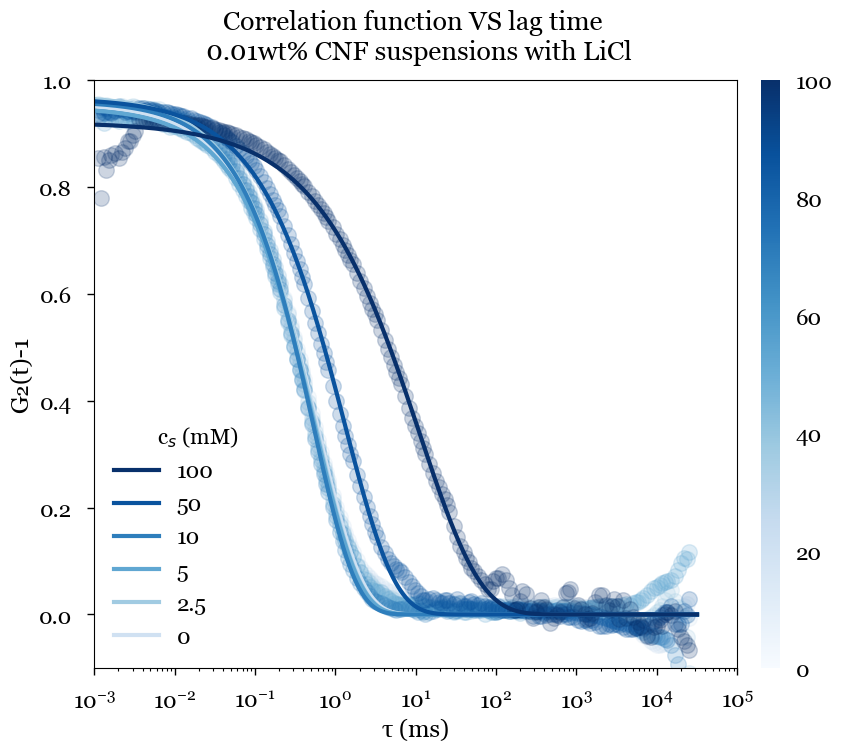

In [246]:
# Plot the fitting

t_fit_cnf001_110_150_0licl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_0licl = g(t_fit_cnf001_110_150_0licl, A_fit_cnf001_110_150_0licl, tau_fit_cnf001_110_150_0licl, beta_fit_cnf001_110_150_0licl)
t_fit_cnf001_110_150_025licl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_025licl = g(t_fit_cnf001_110_150_025licl, A_fit_cnf001_110_150_025licl, tau_fit_cnf001_110_150_025licl, beta_fit_cnf001_110_150_025licl)
t_fit_cnf001_110_150_050licl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_050licl = g(t_fit_cnf001_110_150_050licl, A_fit_cnf001_110_150_050licl, tau_fit_cnf001_110_150_050licl, beta_fit_cnf001_110_150_050licl)
t_fit_cnf001_110_150_100licl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_100licl = g(t_fit_cnf001_110_150_100licl, A_fit_cnf001_110_150_100licl, tau_fit_cnf001_110_150_100licl, beta_fit_cnf001_110_150_100licl)
t_fit_cnf001_110_150_500licl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_500licl = g(t_fit_cnf001_110_150_500licl, A_fit_cnf001_110_150_500licl, tau_fit_cnf001_110_150_500licl, beta_fit_cnf001_110_150_500licl)
t_fit_cnf001_110_150_1000licl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_1000licl = g(t_fit_cnf001_110_150_1000licl, A_fit_cnf001_110_150_1000licl, tau_fit_cnf001_110_150_1000licl, beta_fit_cnf001_110_150_1000licl)

t_fit_cnf001_110_150_licl_all = [t_fit_cnf001_110_150_0licl, t_fit_cnf001_110_150_025licl, t_fit_cnf001_110_150_050licl,
                            t_fit_cnf001_110_150_100licl, t_fit_cnf001_110_150_500licl, t_fit_cnf001_110_150_1000licl]

g_fit_cnf001_110_150_licl_all = [g_fit_cnf001_110_150_0licl, g_fit_cnf001_110_150_025licl, g_fit_cnf001_110_150_050licl,
                            g_fit_cnf001_110_150_100licl, g_fit_cnf001_110_150_500licl, g_fit_cnf001_110_150_1000licl]

#__________________________________________________________________________________________________
# Create a colormap
cmap_licl = plt.get_cmap('Blues')
start_index_licl = 1.2

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf001_110_150_licl_all, t_fit_cnf001_110_150_licl_all, g_cnf001_110_150_licl_all, g_fit_cnf001_110_150_licl_all, label_110_150, label_110_150)):
    c = cmap_licl(float(idx + start_index_licl) / len(t_cnf001_110_150_licl_all))
    scatter1 = ax.scatter(x1, y1, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, alpha = 0.2)
    scatter2 = ax.semilogx(x2, y2,
                linestyle='solid', color = c, linewidth=3,  label=label2)

#__________________________________________________________________________________________________
# Add a colorbar that matches the colormap
salt_conc001_110_150_licl_all = label_110_150 

# Calculate the overall minimum and maximum values for the colorbar
min_value = min(np.min(salt_conc001_110_150_licl_all[i]) for i in range(len(salt_conc001_110_150_licl_all)))
max_value = max(np.max(salt_conc001_110_150_licl_all[i]) for i in range(len(salt_conc001_110_150_licl_all)))

# Add a colorbar that matches the colormap and scales to the actual values
sm = plt.cm.ScalarMappable(cmap=cmap_licl, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

# Create the colorbar with the actual value scale
cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)  # Adjust the pad and aspect values as per your preference
cbar.outline.set_visible(False)
#cbar.set_label('[NaCl] \n (mM)', rotation=0, labelpad=10)

#__________________________________________________________________________________________________
# Create the zoomed-inset axes with a different location
#ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper right')
# Plot the zoomed-in data
#for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf001_110_150, t_fit_cnf001_110_150_nacl, g_cnf001_110_150, g_fit_cnf001_110_150_nacl, label_110_150, label_110_150)):
#    c = cmap(float(idx) / len(t_cnf001_110_150))
#    scatter1_zoom = ax_zoom.scatter(x1, y1, c=np.atleast_2d(c), s = 400,
#                                    marker='o', facecolors=c, edgecolors=c, alpha=0.2, linewidths=3)
#    scatter2_zoom = ax_zoom.semilogx(x2, y2, linestyle='solid', color = c, linewidth=3)

# Specify the limits of the zoomed-in region
#x1, x2, y1, y2 = 1, 3, 0.3, 0.5
#ax_zoom.set_xlim(x1, x2)
#ax_zoom.set_ylim(y1, y2)
# Set the x-axis tick positions for the zoomed-in axes 
#ax_zoom.set_xscale('log')
#xticks = [1, 2, 3]
#yticks = [0.3,0.4,0.5]
#ax_zoom.set_xticks(xticks)
#ax_zoom.set_xticklabels(xticks)
#ax_zoom.set_yticks(yticks)
#ax_zoom.set_yticklabels(yticks)
#ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out')
#ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out')

# Create a mark for the zoomed-in region
#mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

#__________________________________________________________________________________________________
# Get the handles and labels of the legend items
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of the handles and labels
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed handles and labels
ax.legend(handles, labels, loc='lower left', frameon=False)

ax.text(6E-3, 0.32, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.01wt% CNF suspensions with LiCl', pad=15)
#plt.savefig("Correlation function VS Scattering angle of 0.01CNFNaCl at 90deg LiCl.png", dpi=1500, bbox_inches='tight')
plt.show()

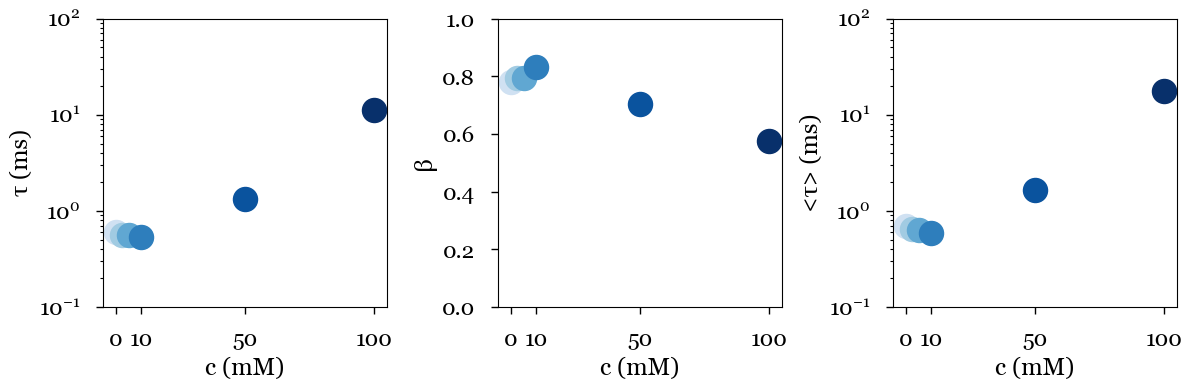

In [247]:
plt.style.use('_mpl-gallery-nogrid')
        
cmap_licl = plt.get_cmap('Blues')
start_index_licl = 1.2

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_licl_all, t_fitted_001CNF_110_150_LiCl, label_110_150)):
    c = cmap_licl(float(idx + start_index_licl) / len(t_cnf001_110_150_licl_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.1, 100)
axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_licl_all, beta_fitted_001CNF_110_150_LiCl, label_110_150)):
    c = cmap_licl(float(idx + start_index_licl) / len(t_cnf001_110_150_licl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0,1)
axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[1].set_yscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_licl_all, meantau_001CNF_110_150_licl, label_110_150)):
    c = cmap_licl(float(idx + start_index_licl) / len(t_cnf001_110_150_licl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,100)
axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of LiCl concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

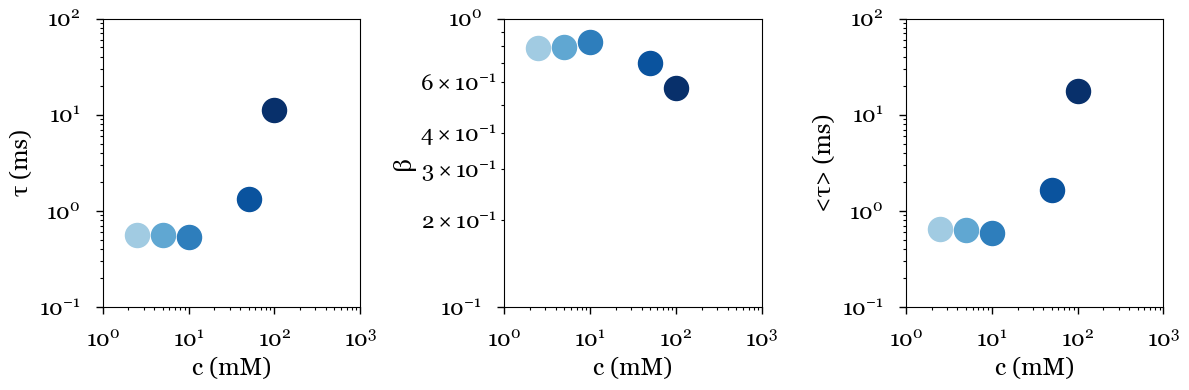

In [248]:
plt.style.use('_mpl-gallery-nogrid')

cmap_licl = plt.get_cmap('Blues')
start_index_licl = 1.2

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_licl_all, t_fitted_001CNF_110_150_LiCl, label_110_150)):
    c = cmap_licl(float(idx + start_index_licl) / len(t_cnf001_110_150_licl_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_xlim(1,1000)
axes[0].set_ylim(0.1,100)
axes[0].set_yscale("log")
#axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_licl_all, beta_fitted_001CNF_110_150_LiCl, label_110_150)):
    c = cmap_licl(float(idx + start_index_licl) / len(t_cnf001_110_150_licl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1,1)
axes[1].set_xlim(1,1000)
#axes[1].set_xticks([0, 10, 50, 100])
axes[1].set_yticks([0.1,0.2, 0.3, 0.4, 0.5, 0.6, 1])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")
axes[1].set_xscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_licl_all, meantau_001CNF_110_150_licl, label_110_150)):
    c = cmap_licl(float(idx + start_index_licl) / len(t_cnf001_110_150_licl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,100)
#axes[2].set_xticks([0, 10, 50, 100])
axes[2].set_xlim(1,1000)
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of LiCl concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto loglog.png", dpi=1500, bbox_inches='tight')
plt.show()

# NaCl

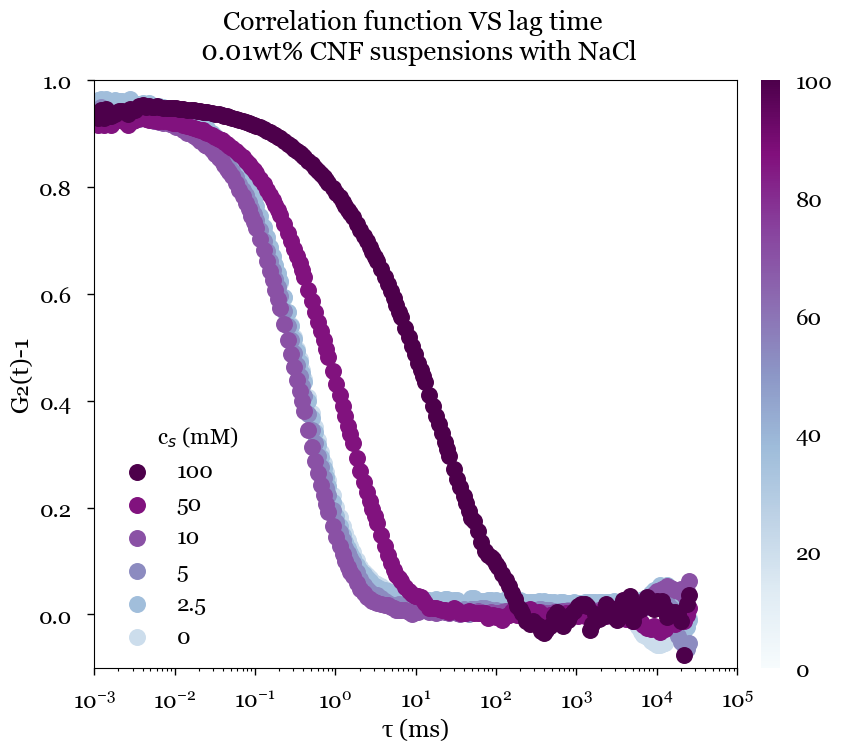

In [249]:
# Import Correlation Function data 
cnf001_110_150_025nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/NaCl/0.01CNF(1.5mmol)_2.5mMNaCl/Measurement 5/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_050nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/NaCl/0.01CNF(1.5mmol)_5mMNaCl/Measurement 5/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_100nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/NaCl/0.01CNF(1.5mmol)_10mMNaCl/Measurement 5/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_500nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/NaCl/0.01CNF(1.5mmol)_50mMNaCl/Measurement 5/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_1000nacl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/NaCl/0.01CNF(1.5mmol)_100mMNaCl/Measurement 5/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf001_110_150_0nacl = cnf001_110_150.iloc[28:,0]
lagtime_cnf001_110_150_0nacl_ms = lagtime_cnf001_110_150_0nacl*1000
corrfx_cnf001_110_150_0nacl = cnf001_110_150.iloc[28:,1]

lagtime_cnf001_110_150_025nacl = cnf001_110_150_025nacl.iloc[28:,0]
lagtime_cnf001_110_150_025nacl_ms = lagtime_cnf001_110_150_025nacl*1000
corrfx_cnf001_110_150_025nacl = cnf001_110_150_025nacl.iloc[28:,1]

lagtime_cnf001_110_150_050nacl = cnf001_110_150_050nacl.iloc[28:,0]
lagtime_cnf001_110_150_050nacl_ms = lagtime_cnf001_110_150_050nacl*1000
corrfx_cnf001_110_150_050nacl = cnf001_110_150_050nacl.iloc[28:,1]

lagtime_cnf001_110_150_100nacl = cnf001_110_150_100nacl.iloc[28:,0]
lagtime_cnf001_110_150_100nacl_ms = lagtime_cnf001_110_150_100nacl*1000
corrfx_cnf001_110_150_100nacl = cnf001_110_150_100nacl.iloc[28:,1]

lagtime_cnf001_110_150_500nacl = cnf001_110_150_500nacl.iloc[28:,0]
lagtime_cnf001_110_150_500nacl_ms = lagtime_cnf001_110_150_500nacl*1000
corrfx_cnf001_110_150_500nacl = cnf001_110_150_500nacl.iloc[28:,1]

lagtime_cnf001_110_150_1000nacl = cnf001_110_150_1000nacl.iloc[28:,0]
lagtime_cnf001_110_150_1000nacl_ms = lagtime_cnf001_110_150_1000nacl*1000
corrfx_cnf001_110_150_1000nacl = cnf001_110_150_1000nacl.iloc[28:,1]

t_cnf001_110_150_nacl_all = [lagtime_cnf001_110_150_0nacl_ms, lagtime_cnf001_110_150_025nacl_ms, lagtime_cnf001_110_150_050nacl_ms,
                   lagtime_cnf001_110_150_100nacl_ms, lagtime_cnf001_110_150_500nacl_ms, lagtime_cnf001_110_150_1000nacl_ms]
g_cnf001_110_150_nacl_all = [corrfx_cnf001_110_150_0nacl, corrfx_cnf001_110_150_025nacl, corrfx_cnf001_110_150_050nacl,
                   corrfx_cnf001_110_150_100nacl, corrfx_cnf001_110_150_500nacl, corrfx_cnf001_110_150_1000nacl]
label_110_150 = [0, 2.5, 5, 10, 50, 100]
#label_110_150 = ['0mM NaCl', '2.5mM NaCl', '5mM NaCl',
#                '10mM NaCl', '50mM NaCl', '100mM NaCl']
#__________________________________________________________________________________________________
# Create a colormap
cmap_nacl = plt.get_cmap('BuPu')
start_index_nacl = 1.2

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x, y, label) in enumerate(zip(t_cnf001_110_150_nacl_all, g_cnf001_110_150_nacl_all, label_110_150)):
    c = cmap_nacl(float(idx + start_index_nacl) / len(t_cnf001_110_150_nacl_all))
    scatter1 = ax.scatter(x, y, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
   # scatter1.set_facecolor('none')
#__________________________________________________________________________________________________

# Add a colorbar that matches the colormap
salt_conc001_110_150_nacl_all = label_110_150

# Calculate the overall minimum and maximum values for the colorbar
min_value = min(np.min(salt_conc001_110_150_nacl_all[i]) for i in range(len(salt_conc001_110_150_nacl_all)))
max_value = max(np.max(salt_conc001_110_150_nacl_all[i]) for i in range(len(salt_conc001_110_150_nacl_all)))

# Add a colorbar that matches the colormap and scales to the actual values
sm = plt.cm.ScalarMappable(cmap=cmap_nacl, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

# Create the colorbar with the actual value scale
cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)  # Adjust the pad and aspect values as per your preference
cbar.outline.set_visible(False)
#cbar.set_label('[NaCl] \n (mM)', rotation=0, labelpad=10)

#__________________________________________________________________________________________________
# Create the zoomed-inset axes with a different location
#ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper right')
# Plot the zoomed-in data
#for idx, (x, y) in enumerate(zip(t_cnf001_110_150_nacl_all, g_cnf001_110_150_nacl_all)):
#    c = cmap(float(idx) / len(t_cnf001_110_150_nacl_all))
#    scatter1_zoom = ax_zoom.scatter(x, y, c=np.atleast_2d(c), s = 300,
#                                    marker='o', facecolors=c, edgecolors=c, linewidths=3)
    #scatter1_zoom.set_facecolor('none')

# Specify the limits of the zoomed-in region
#x1, x2, y1, y2 = 1, 3, 0.3, 0.5
#ax_zoom.set_xlim(x1, x2)
#ax_zoom.set_ylim(y1, y2)

# Set the x-axis tick positions for the zoomed-in axes 
#ax_zoom.set_xscale('log')
#xticks = [1, 2, 3]
#yticks = [0.3,0.4,0.5]
#ax_zoom.set_xticks(xticks)
#ax_zoom.set_xticklabels(xticks)
#ax_zoom.set_yticks(yticks)
#ax_zoom.set_yticklabels(yticks)
#ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out')
#ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out')

# Create a mark for the zoomed-in region
#mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

#__________________________________________________________________________________________________
# Get the handles and labels of the legend items
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of the handles and labels
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed handles and labels
ax.legend(handles, labels, loc='lower left', frameon=False)

ax.text(6E-3, 0.32, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.01wt% CNF suspensions with NaCl', pad=15)
#plt.savefig("Correlation function VS lag time 0.01wt% CNF suspensions NaCl at 90deg 2D Auto Nacl.png", dpi=1500, bbox_inches='tight')
plt.show()

In [250]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf001_110_150_0nacl = lagtime_cnf001_110_150_0nacl_ms
g_t_cnf001_110_150_0nacl = corrfx_cnf001_110_150_0nacl
t_cnf001_110_150_025nacl = lagtime_cnf001_110_150_025nacl_ms
g_t_cnf001_110_150_025nacl = corrfx_cnf001_110_150_025nacl
t_cnf001_110_150_050nacl = lagtime_cnf001_110_150_050nacl_ms
g_t_cnf001_110_150_050nacl = corrfx_cnf001_110_150_050nacl
t_cnf001_110_150_100nacl = lagtime_cnf001_110_150_100nacl_ms
g_t_cnf001_110_150_100nacl = corrfx_cnf001_110_150_100nacl
t_cnf001_110_150_500nacl = lagtime_cnf001_110_150_500nacl_ms
g_t_cnf001_110_150_500nacl = corrfx_cnf001_110_150_500nacl
t_cnf001_110_150_1000nacl = lagtime_cnf001_110_150_1000nacl_ms
g_t_cnf001_110_150_1000nacl = corrfx_cnf001_110_150_1000nacl

p0 = [1, 1, 1]
# Set the parameter bounds
bounds = ([0, 0.0001, 0], [1, 10000, 1])

params_cnf001_110_150_0nacl, cov_cnf001_110_150_0nacl = curve_fit(g, t_cnf001_110_150_0nacl, g_t_cnf001_110_150_0nacl, p0, bounds=bounds)
A_fit_cnf001_110_150_0nacl, tau_fit_cnf001_110_150_0nacl, beta_fit_cnf001_110_150_0nacl = params_cnf001_110_150_0nacl

params_cnf001_110_150_025nacl, cov_cnf001_110_150_025nacl = curve_fit(g, t_cnf001_110_150_025nacl, g_t_cnf001_110_150_025nacl, p0, bounds=bounds)
A_fit_cnf001_110_150_025nacl, tau_fit_cnf001_110_150_025nacl, beta_fit_cnf001_110_150_025nacl = params_cnf001_110_150_025nacl

params_cnf001_110_150_050nacl, cov_cnf001_110_150_050nacl = curve_fit(g, t_cnf001_110_150_050nacl, g_t_cnf001_110_150_050nacl, p0, bounds=bounds)
A_fit_cnf001_110_150_050nacl, tau_fit_cnf001_110_150_050nacl, beta_fit_cnf001_110_150_050nacl = params_cnf001_110_150_050nacl

params_cnf001_110_150_100nacl, cov_cnf001_110_150_100nacl = curve_fit(g, t_cnf001_110_150_100nacl, g_t_cnf001_110_150_100nacl, p0, bounds=bounds)
A_fit_cnf001_110_150_100nacl, tau_fit_cnf001_110_150_100nacl, beta_fit_cnf001_110_150_100nacl = params_cnf001_110_150_100nacl

params_cnf001_110_150_500nacl, cov_cnf001_110_150_500nacl = curve_fit(g, t_cnf001_110_150_500nacl, g_t_cnf001_110_150_500nacl, p0, bounds=bounds)
A_fit_cnf001_110_150_500nacl, tau_fit_cnf001_110_150_500nacl, beta_fit_cnf001_110_150_500nacl = params_cnf001_110_150_500nacl

params_cnf001_110_150_1000nacl, cov_cnf001_110_150_1000nacl = curve_fit(g, t_cnf001_110_150_1000nacl, g_t_cnf001_110_150_1000nacl, p0, bounds=bounds)
A_fit_cnf001_110_150_1000nacl, tau_fit_cnf001_110_150_1000nacl, beta_fit_cnf001_110_150_1000nacl = params_cnf001_110_150_1000nacl

# Table using DataFrame
samples_001CNF_110_150_NaCl = ['0mM NaCl','2.5mM NaCl', '5mM NaCl', '10mM NaCl', '50mM NaCl', '100mM NaCl']
A_fitted_001CNF_110_150_NaCl = [A_fit_cnf001_110_150_0nacl, A_fit_cnf001_110_150_025nacl, A_fit_cnf001_110_150_050nacl, A_fit_cnf001_110_150_100nacl, A_fit_cnf001_110_150_500nacl, A_fit_cnf001_110_150_1000nacl]
t_fitted_001CNF_110_150_NaCl = [tau_fit_cnf001_110_150_0nacl, tau_fit_cnf001_110_150_025nacl, tau_fit_cnf001_110_150_050nacl, tau_fit_cnf001_110_150_100nacl, tau_fit_cnf001_110_150_500nacl, tau_fit_cnf001_110_150_1000nacl]
beta_fitted_001CNF_110_150_NaCl =  [beta_fit_cnf001_110_150_0nacl, beta_fit_cnf001_110_150_025nacl, beta_fit_cnf001_110_150_050nacl, beta_fit_cnf001_110_150_100nacl, beta_fit_cnf001_110_150_500nacl, beta_fit_cnf001_110_150_1000nacl]

# mean tau calculations
meantau_cnf001s_110_150_nacl = ["meantau_0.01wt.%CNF_0mMnacl", "meantau_0.01wt.%CNF_2.5mMnacl", "meantau_0.01wt.%CNF_5mMnacl", "meantau_0.01wt.%CNF_10mMnacl", "meantau_0.01wt.%CNF_50mMnacl", "meantau_0.01wt.%CNF_100mMnacl"]
meantau_cnf001s_110_150_nacl_r = {}
for i in range(len(t_fitted_001CNF_110_150_NaCl)):
    meantau_cnf001_110_150_nacl = (t_fitted_001CNF_110_150_NaCl[i]/beta_fitted_001CNF_110_150_NaCl[i])*scipy.special.gamma(1/beta_fitted_001CNF_110_150_NaCl[i])
    name = meantau_cnf001s_110_150_nacl[i]
    meantau_cnf001s_110_150_nacl_r[name] = meantau_cnf001_110_150_nacl
    
meantau_001CNF_110_150_nacl = np.array(list(meantau_cnf001s_110_150_nacl_r.values()))

table_Parameters_001CNF_110_150_NaCl = {
    '0.01wt.%CNF with': samples_001CNF_110_150_NaCl ,
    'A' : A_fitted_001CNF_110_150_NaCl,
    '\u03C4 (ms)': t_fitted_001CNF_110_150_NaCl,
    '\u03B2': beta_fitted_001CNF_110_150_NaCl,
    '<\u03C4> (ms)': meantau_001CNF_110_150_nacl
}

table_Parameters_001CNF_110_150_NaCl_draw = pd.DataFrame(table_Parameters_001CNF_110_150_NaCl)

styled_table_Parameters_001CNF_110_150_NaCl_draw = table_Parameters_001CNF_110_150_NaCl_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Purples') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.2f}', '\u03B2': '{:.3f}', '<\u03C4> (ms)': '{:.2f}'})\
    .hide(axis='index')

styled_table_Parameters_001CNF_110_150_NaCl_draw          

0.01wt.%CNF with,A,τ (ms),β,<τ> (ms)
0mM NaCl,0.957,0.60,0.781,0.69
2.5mM NaCl,0.981,0.56,0.795,0.63
5mM NaCl,0.955,0.53,0.808,0.59
10mM NaCl,0.949,0.47,0.837,0.52
50mM NaCl,0.943,1.51,0.718,1.86
100mM NaCl,0.956,19.76,0.563,32.45


In [251]:
# Save the styled table to a html table 
html_styled_table_Parameters_001CNF_110_150_NaCl = 'styled_table_Parameters_001CNF_110_150_NaCl_draw.html'
styled_table_Parameters_001CNF_110_150_NaCl_draw.to_html(html_styled_table_Parameters_001CNF_110_150_NaCl)
#IPython.display.display(IPython.display.HTML(html_styled_table_Parameters_neatCNF))

# Convert the HTML file to an image/Save the htmal table to a png file
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 3,
   # 'width': 1200,  # A djust the width and height as needed
   # 'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}
image_table_Parameters_001CNF_110_150_NaCl = 'Table Fitted Parameters 001wt.%CNF 1.50 mmol NaCl.png'
imgkit.from_file(html_styled_table_Parameters_001CNF_110_150_NaCl, image_table_Parameters_001CNF_110_150_NaCl, options=options)

True

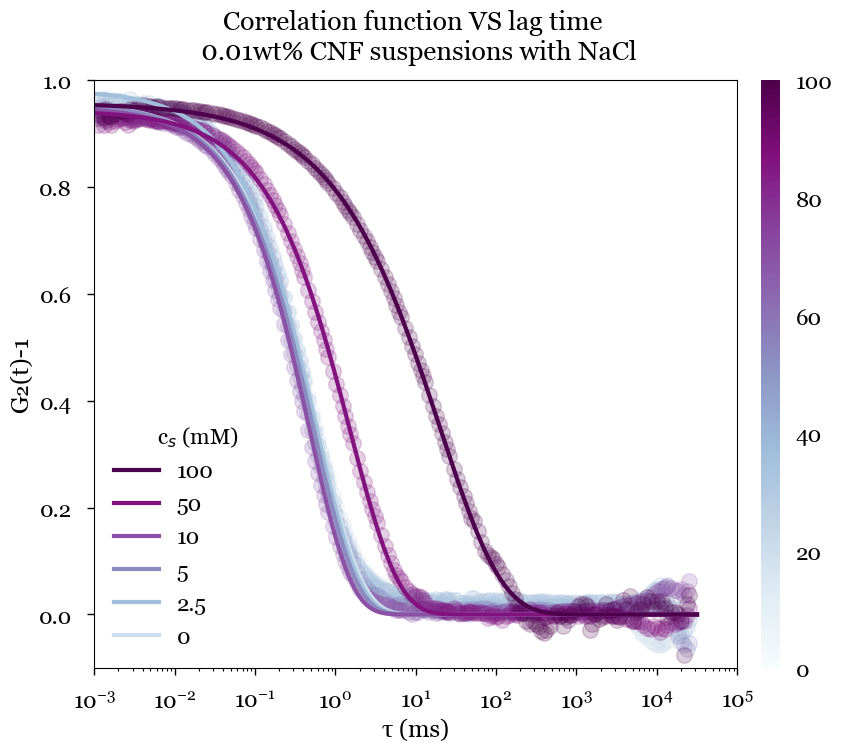

In [253]:
# Plot the fitting

t_fit_cnf001_110_150_0nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_0nacl = g(t_fit_cnf001_110_150_0nacl, A_fit_cnf001_110_150_0nacl, tau_fit_cnf001_110_150_0nacl, beta_fit_cnf001_110_150_0nacl)
t_fit_cnf001_110_150_025nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_025nacl = g(t_fit_cnf001_110_150_025nacl, A_fit_cnf001_110_150_025nacl, tau_fit_cnf001_110_150_025nacl, beta_fit_cnf001_110_150_025nacl)
t_fit_cnf001_110_150_050nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_050nacl = g(t_fit_cnf001_110_150_050nacl, A_fit_cnf001_110_150_050nacl, tau_fit_cnf001_110_150_050nacl, beta_fit_cnf001_110_150_050nacl)
t_fit_cnf001_110_150_100nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_100nacl = g(t_fit_cnf001_110_150_100nacl, A_fit_cnf001_110_150_100nacl, tau_fit_cnf001_110_150_100nacl, beta_fit_cnf001_110_150_100nacl)
t_fit_cnf001_110_150_500nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_500nacl = g(t_fit_cnf001_110_150_500nacl, A_fit_cnf001_110_150_500nacl, tau_fit_cnf001_110_150_500nacl, beta_fit_cnf001_110_150_500nacl)
t_fit_cnf001_110_150_1000nacl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_1000nacl = g(t_fit_cnf001_110_150_1000nacl, A_fit_cnf001_110_150_1000nacl, tau_fit_cnf001_110_150_1000nacl, beta_fit_cnf001_110_150_1000nacl)

t_fit_cnf001_110_150_nacl_all = [t_fit_cnf001_110_150_0nacl, t_fit_cnf001_110_150_025nacl, t_fit_cnf001_110_150_050nacl,
                            t_fit_cnf001_110_150_100nacl, t_fit_cnf001_110_150_500nacl, t_fit_cnf001_110_150_1000nacl]

g_fit_cnf001_110_150_nacl_all = [g_fit_cnf001_110_150_0nacl, g_fit_cnf001_110_150_025nacl, g_fit_cnf001_110_150_050nacl,
                            g_fit_cnf001_110_150_100nacl, g_fit_cnf001_110_150_500nacl, g_fit_cnf001_110_150_1000nacl]

#__________________________________________________________________________________________________
# Create a colormap
cmap_nacl = plt.get_cmap('BuPu')
start_index_nacl = 1.2

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf001_110_150_nacl_all, t_fit_cnf001_110_150_nacl_nacl_all, g_cnf001_110_150_nacl_all, g_fit_cnf001_110_150_nacl_all, label_110_150, label_110_150)):
    c = cmap_nacl(float(idx + start_index_nacl) / len(t_cnf001_110_150_nacl_all))
    scatter1 = ax.scatter(x1, y1, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, alpha = 0.2)
    scatter2 = ax.semilogx(x2, y2,
                linestyle='solid', color = c, linewidth=3,  label=label2)

#__________________________________________________________________________________________________
# Add a colorbar that matches the colormap
salt_conc001_110_150_nacl = label_110_150 

# Calculate the overall minimum and maximum values for the colorbar
min_value = min(np.min(salt_conc001_110_150_nacl[i]) for i in range(len(salt_conc001_110_150_nacl)))
max_value = max(np.max(salt_conc001_110_150_nacl[i]) for i in range(len(salt_conc001_110_150_nacl)))

# Add a colorbar that matches the colormap and scales to the actual values
sm = plt.cm.ScalarMappable(cmap=cmap_nacl, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

# Create the colorbar with the actual value scale
cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)  # Adjust the pad and aspect values as per your preference
cbar.outline.set_visible(False)
#cbar.set_label('[NaCl] \n (mM)', rotation=0, labelpad=10)

#__________________________________________________________________________________________________
# Create the zoomed-inset axes with a different location
#ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper right')
# Plot the zoomed-in data
#for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf001_110_150, t_fit_cnf001_110_150_nacl, g_cnf001_110_150, g_fit_cnf001_110_150_nacl, label_110_150, label_110_150)):
#    c = cmap(float(idx) / len(t_cnf001_110_150))
#    scatter1_zoom = ax_zoom.scatter(x1, y1, c=np.atleast_2d(c), s = 400,
#                                    marker='o', facecolors=c, edgecolors=c, alpha=0.2, linewidths=3)
#    scatter2_zoom = ax_zoom.semilogx(x2, y2, linestyle='solid', color = c, linewidth=3)

# Specify the limits of the zoomed-in region
#x1, x2, y1, y2 = 1, 3, 0.3, 0.5
#ax_zoom.set_xlim(x1, x2)
#ax_zoom.set_ylim(y1, y2)
# Set the x-axis tick positions for the zoomed-in axes 
#ax_zoom.set_xscale('log')
#xticks = [1, 2, 3]
#yticks = [0.3,0.4,0.5]
#ax_zoom.set_xticks(xticks)
#ax_zoom.set_xticklabels(xticks)
#ax_zoom.set_yticks(yticks)
#ax_zoom.set_yticklabels(yticks)
#ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out')
#ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out')

# Create a mark for the zoomed-in region
#mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

#__________________________________________________________________________________________________
# Get the handles and labels of the legend items
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of the handles and labels
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed handles and labels
ax.legend(handles, labels, loc='lower left', frameon=False)

ax.text(6E-3, 0.32, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.01wt% CNF suspensions with NaCl', pad=15)
#plt.savefig("Correlation function VS Scattering angle of 0.01CNFNaCl at 90deg fit zoom NaCl.png", dpi=1500, bbox_inches='tight')
plt.show()

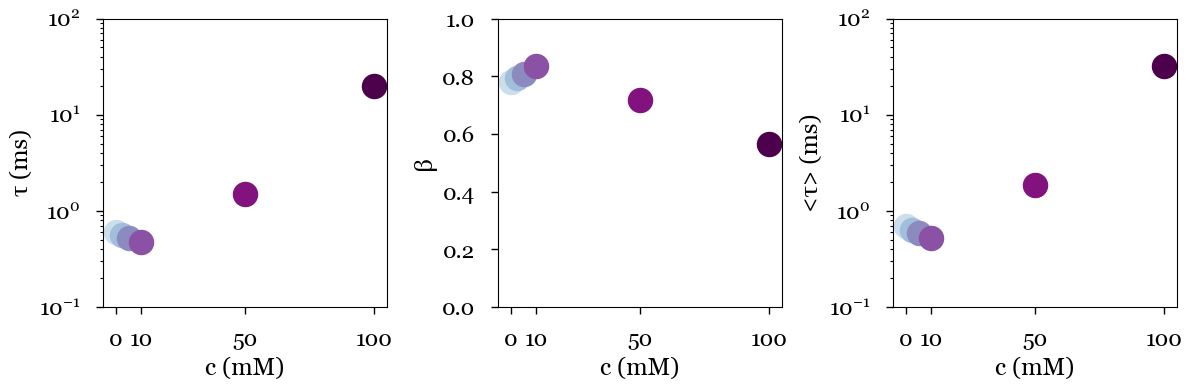

In [254]:
plt.style.use('_mpl-gallery-nogrid')
        
cmap_nacl = plt.get_cmap('BuPu')
start_index_nacl = 1.2

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_nacl_all, t_fitted_001CNF_110_150_NaCl, label_110_150)):
    c = cmap_nacl(float(idx + start_index_nacl) / len(t_cnf001_110_150_nacl_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.1, 100)
axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_nacl_all, beta_fitted_001CNF_110_150_NaCl, label_110_150)):
    c = cmap_nacl(float(idx + start_index_nacl) / len(t_cnf001_110_150_nacl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0,1)
axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[1].set_yscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_nacl_all, meantau_001CNF_110_150_nacl, label_110_150)):
    c = cmap_nacl(float(idx + start_index_nacl) / len(t_cnf001_110_150_nacl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,100)
axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of NaCl concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

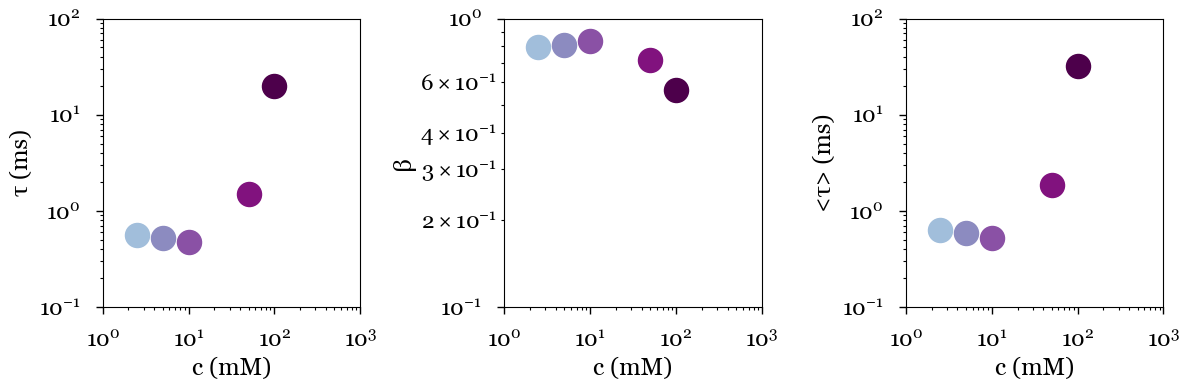

In [255]:
plt.style.use('_mpl-gallery-nogrid')

cmap_nacl = plt.get_cmap('BuPu')
start_index_nacl = 1.2

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150, t_fitted_001CNF_110_150_NaCl, label_110_150)):
    c = cmap_nacl(float(idx + start_index_nacl) / len(t_cnf001_110_150_nacl_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_xlim(1,1000)
axes[0].set_ylim(0.1,100)
axes[0].set_yscale("log")
#axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150, beta_fitted_001CNF_110_150_NaCl, label_110_150)):
    c = cmap_nacl(float(idx + start_index_nacl) / len(t_cnf001_110_150_nacl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1,1)
axes[1].set_xlim(1,1000)
#axes[1].set_xticks([0, 10, 50, 100])
axes[1].set_yticks([0.1,0.2, 0.3, 0.4, 0.5, 0.6, 1])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")
axes[1].set_xscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_nacl_all, meantau_001CNF_110_150_nacl, label_110_150)):
    c = cmap_nacl(float(idx + start_index_nacl) / len(t_cnf001_110_150_nacl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,100)
#axes[2].set_xticks([0, 10, 50, 100])
axes[2].set_xlim(1,1000)
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of NaCl concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto loglog.png", dpi=1500, bbox_inches='tight')
plt.show()

# KCl

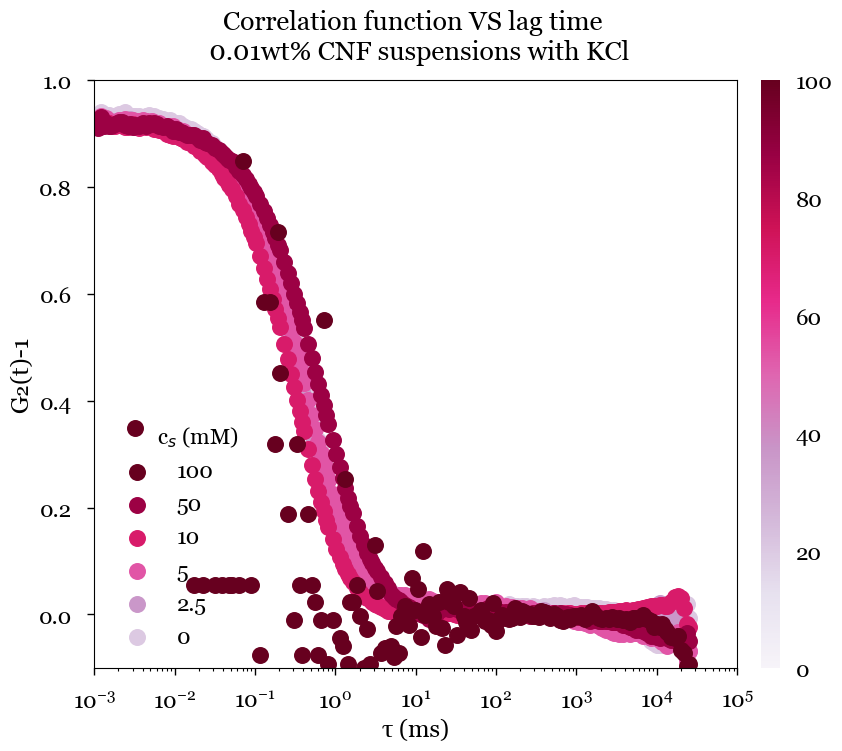

In [257]:
# Import Correlation Function data 
cnf001_110_150_025kcl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/KCl/0.01CNF(1.5mmol)_2.5mMKCl/Measurement 5/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_050kcl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/KCl/0.01CNF(1.5mmol)_5mMKCl/Measurement 5/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_100kcl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/KCl/0.01CNF(1.5mmol)_10mMKCl/Measurement 5/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_500kcl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/KCl/0.01CNF(1.5mmol)_50mMKCl/Measurement 5/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_1000kcl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/KCl/0.01CNF(1.5mmol)_100mMKCl/Measurement 5/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf001_110_150_0kcl = cnf001_110_150.iloc[28:,0]
lagtime_cnf001_110_150_0kcl_ms = lagtime_cnf001_110_150_0kcl*1000
corrfx_cnf001_110_150_0kcl = cnf001_110_150.iloc[28:,1]

lagtime_cnf001_110_150_025kcl = cnf001_110_150_025kcl.iloc[28:,0]
lagtime_cnf001_110_150_025kcl_ms = lagtime_cnf001_110_150_025kcl*1000
corrfx_cnf001_110_150_025kcl = cnf001_110_150_025kcl.iloc[28:,1]

lagtime_cnf001_110_150_050kcl = cnf001_110_150_050kcl.iloc[28:,0]
lagtime_cnf001_110_150_050kcl_ms = lagtime_cnf001_110_150_050kcl*1000
corrfx_cnf001_110_150_050kcl = cnf001_110_150_050kcl.iloc[28:,1]

lagtime_cnf001_110_150_100kcl = cnf001_110_150_100kcl.iloc[28:,0]
lagtime_cnf001_110_150_100kcl_ms = lagtime_cnf001_110_150_100kcl*1000
corrfx_cnf001_110_150_100kcl = cnf001_110_150_100kcl.iloc[28:,1]

lagtime_cnf001_110_150_500kcl = cnf001_110_150_500kcl.iloc[28:,0]
lagtime_cnf001_110_150_500kcl_ms = lagtime_cnf001_110_150_500kcl*1000
corrfx_cnf001_110_150_500kcl = cnf001_110_150_500kcl.iloc[28:,1]

lagtime_cnf001_110_150_1000kcl = cnf001_110_150_1000kcl.iloc[28:,0]
lagtime_cnf001_110_150_1000kcl_ms = lagtime_cnf001_110_150_1000kcl*1000
corrfx_cnf001_110_150_1000kcl = cnf001_110_150_1000kcl.iloc[28:,1]

t_cnf001_110_150_kcl_all = [lagtime_cnf001_110_150_0kcl_ms, lagtime_cnf001_110_150_025kcl_ms, lagtime_cnf001_110_150_050kcl_ms,
                   lagtime_cnf001_110_150_100kcl_ms, lagtime_cnf001_110_150_500kcl_ms, lagtime_cnf001_110_150_1000kcl_ms]
g_cnf001_110_150_kcl_all = [corrfx_cnf001_110_150_0kcl, corrfx_cnf001_110_150_025kcl, corrfx_cnf001_110_150_050kcl,
                   corrfx_cnf001_110_150_100kcl, corrfx_cnf001_110_150_500kcl, corrfx_cnf001_110_150_1000kcl]
label_110_150 = [0, 2.5, 5, 10, 50, 100]
#label_110_150 = ['0mM NaCl', '2.5mM NaCl', '5mM NaCl',
#                '10mM NaCl', '50mM NaCl', '100mM NaCl']
#__________________________________________________________________________________________________
# Create a colormap
cmap_kcl = plt.get_cmap('PuRd')
start_index_kcl = 1.2

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x, y, label) in enumerate(zip(t_cnf001_110_150_kcl_all, g_cnf001_110_150_kcl_all, label_110_150)):
    c = cmap_kcl(float(idx + start_index_kcl) / len(t_cnf001_110_150_kcl_all))
    scatter1 = ax.scatter(x, y, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
   # scatter1.set_facecolor('none')
#__________________________________________________________________________________________________

# Add a colorbar that matches the colormap
salt_conc001_110_150_kcl_all = label_110_150

# Calculate the overall minimum and maximum values for the colorbar
min_value = min(np.min(salt_conc001_110_150_kcl_all[i]) for i in range(len(salt_conc001_110_150_kcl_all)))
max_value = max(np.max(salt_conc001_110_150_kcl_all[i]) for i in range(len(salt_conc001_110_150_kcl_all)))

# Add a colorbar that matches the colormap and scales to the actual values
sm = plt.cm.ScalarMappable(cmap=cmap_kcl, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

# Create the colorbar with the actual value scale
cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)  # Adjust the pad and aspect values as per your preference
cbar.outline.set_visible(False)
#cbar.set_label('[NaCl] \n (mM)', rotation=0, labelpad=10)

#__________________________________________________________________________________________________
# Create the zoomed-inset axes with a different location
#ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper right')
# Plot the zoomed-in data
#for idx, (x, y) in enumerate(zip(t_cnf001_110_150_kcl_all, g_cnf001_110_150_kcl_all)):
#    c = cmap_kcl(float(idx) / len(t_cnf001_110_150_kcl_all))
#    scatter1_zoom = ax_zoom.scatter(x, y, c=np.atleast_2d(c), s = 300,
#                                    marker='o', facecolors=c, edgecolors=c, linewidths=3)
    #scatter1_zoom.set_facecolor('none')

# Specify the limits of the zoomed-in region
#x1, x2, y1, y2 = 1, 3, 0.3, 0.5
#ax_zoom.set_xlim(x1, x2)
#ax_zoom.set_ylim(y1, y2)

# Set the x-axis tick positions for the zoomed-in axes 
#ax_zoom.set_xscale('log')
#xticks = [1, 2, 3]
#yticks = [0.3,0.4,0.5]
#ax_zoom.set_xticks(xticks)
#ax_zoom.set_xticklabels(xticks)
#ax_zoom.set_yticks(yticks)
#ax_zoom.set_yticklabels(yticks)
#ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out')
#ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out')

# Create a mark for the zoomed-in region
#mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

#__________________________________________________________________________________________________
# Get the handles and labels of the legend items
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of the handles and labels
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed handles and labels
ax.legend(handles, labels, loc='lower left', frameon=False)

ax.text(6E-3, 0.32, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.01wt% CNF suspensions with KCl', pad=15)
#plt.savefig("Correlation function VS lag time 0.01wt% CNF suspensions (1.50mmol COONa) at 90deg 2D Auto KCl.png", dpi=1500, bbox_inches='tight')
plt.show()

In [258]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf001_110_150_0kcl = lagtime_cnf001_110_150_0kcl_ms
g_t_cnf001_110_150_0kcl = corrfx_cnf001_110_150_0kcl
t_cnf001_110_150_025kcl = lagtime_cnf001_110_150_025kcl_ms
g_t_cnf001_110_150_025kcl = corrfx_cnf001_110_150_025kcl
t_cnf001_110_150_050kcl = lagtime_cnf001_110_150_050kcl_ms
g_t_cnf001_110_150_050kcl = corrfx_cnf001_110_150_050kcl
t_cnf001_110_150_100kcl = lagtime_cnf001_110_150_100kcl_ms
g_t_cnf001_110_150_100kcl = corrfx_cnf001_110_150_100kcl
t_cnf001_110_150_500kcl = lagtime_cnf001_110_150_500kcl_ms
g_t_cnf001_110_150_500kcl = corrfx_cnf001_110_150_500kcl
t_cnf001_110_150_1000kcl = lagtime_cnf001_110_150_1000kcl_ms
g_t_cnf001_110_150_1000kcl = corrfx_cnf001_110_150_1000kcl

p0 = [1, 1, 1]
# Set the parameter bounds
bounds = ([0, 0.0001, 0], [1, 10000, 1])

params_cnf001_110_150_0kcl, cov_cnf001_110_150_0kcl = curve_fit(g, t_cnf001_110_150_0kcl, g_t_cnf001_110_150_0kcl, p0, bounds=bounds)
A_fit_cnf001_110_150_0kcl, tau_fit_cnf001_110_150_0kcl, beta_fit_cnf001_110_150_0kcl = params_cnf001_110_150_0kcl

params_cnf001_110_150_025kcl, cov_cnf001_110_150_025kcl = curve_fit(g, t_cnf001_110_150_025kcl, g_t_cnf001_110_150_025kcl, p0, bounds=bounds)
A_fit_cnf001_110_150_025kcl, tau_fit_cnf001_110_150_025kcl, beta_fit_cnf001_110_150_025kcl = params_cnf001_110_150_025kcl

params_cnf001_110_150_050kcl, cov_cnf001_110_150_050kcl = curve_fit(g, t_cnf001_110_150_050kcl, g_t_cnf001_110_150_050kcl, p0, bounds=bounds)
A_fit_cnf001_110_150_050kcl, tau_fit_cnf001_110_150_050kcl, beta_fit_cnf001_110_150_050kcl = params_cnf001_110_150_050kcl

params_cnf001_110_150_100kcl, cov_cnf001_110_150_100kcl = curve_fit(g, t_cnf001_110_150_100kcl, g_t_cnf001_110_150_100kcl, p0, bounds=bounds)
A_fit_cnf001_110_150_100kcl, tau_fit_cnf001_110_150_100kcl, beta_fit_cnf001_110_150_100kcl = params_cnf001_110_150_100kcl

params_cnf001_110_150_500kcl, cov_cnf001_110_150_500kcl = curve_fit(g, t_cnf001_110_150_500kcl, g_t_cnf001_110_150_500kcl, p0, bounds=bounds)
A_fit_cnf001_110_150_500kcl, tau_fit_cnf001_110_150_500kcl, beta_fit_cnf001_110_150_500kcl = params_cnf001_110_150_500kcl

params_cnf001_110_150_1000kcl, cov_cnf001_110_150_1000kcl = curve_fit(g, t_cnf001_110_150_1000kcl, g_t_cnf001_110_150_1000kcl, p0, bounds=bounds)
A_fit_cnf001_110_150_1000kcl, tau_fit_cnf001_110_150_1000kcl, beta_fit_cnf001_110_150_1000kcl = params_cnf001_110_150_1000kcl

# Table using DataFrame
samples_001CNF_110_150_KCl = ['0mM KCl','2.5mM KCl', '5mM KCl', '10mM KCl', '50mM KCl', '100mM KCl']
A_fitted_001CNF_110_150_KCl = [A_fit_cnf001_110_150_0kcl, A_fit_cnf001_110_150_025kcl, A_fit_cnf001_110_150_050kcl, A_fit_cnf001_110_150_100kcl, A_fit_cnf001_110_150_500kcl, A_fit_cnf001_110_150_1000kcl]
t_fitted_001CNF_110_150_KCl = [tau_fit_cnf001_110_150_0kcl, tau_fit_cnf001_110_150_025kcl, tau_fit_cnf001_110_150_050kcl, tau_fit_cnf001_110_150_100kcl, tau_fit_cnf001_110_150_500kcl, tau_fit_cnf001_110_150_1000kcl]
beta_fitted_001CNF_110_150_KCl =  [beta_fit_cnf001_110_150_0kcl, beta_fit_cnf001_110_150_025kcl, beta_fit_cnf001_110_150_050kcl, beta_fit_cnf001_110_150_100kcl, beta_fit_cnf001_110_150_500kcl, beta_fit_cnf001_110_150_1000kcl]

# mean tau calculations
meantau_cnf001s_110_150_kcl = ["meantau_0.01wt.%CNF_0mMkcl", "meantau_0.01wt.%CNF_2.5mMkcl", "meantau_0.01wt.%CNF_5mMkcl", "meantau_0.01wt.%CNF_10mMkcl", "meantau_0.01wt.%CNF_50mMkcl", "meantau_0.01wt.%CNF_100mMkcl"]
meantau_cnf001s_110_150_kcl_r = {}
for i in range(len(t_fitted_001CNF_110_150_KCl)):
    meantau_cnf001_110_150_kcl = (t_fitted_001CNF_110_150_KCl[i]/beta_fitted_001CNF_110_150_KCl[i])*scipy.special.gamma(1/beta_fitted_001CNF_110_150_KCl[i])
    name = meantau_cnf001s_110_150_kcl[i]
    meantau_cnf001s_110_150_kcl_r[name] = meantau_cnf001_110_150_kcl
    
meantau_001CNF_110_150_kcl = np.array(list(meantau_cnf001s_110_150_kcl_r.values()))

table_Parameters_001CNF_110_150_KCl = {
    '0.01wt.%CNF with': samples_001CNF_110_150_KCl ,
    'A' : A_fitted_001CNF_110_150_KCl,
    '\u03C4 (ms)': t_fitted_001CNF_110_150_KCl,
    '\u03B2': beta_fitted_001CNF_110_150_KCl,
    '<\u03C4> (ms)': meantau_001CNF_110_150_kcl
}

table_Parameters_001CNF_110_150_KCl_draw = pd.DataFrame(table_Parameters_001CNF_110_150_KCl)

styled_table_Parameters_001CNF_110_150_KCl_draw = table_Parameters_001CNF_110_150_KCl_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='PuRd') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.2f}', '\u03B2': '{:.3f}', '<\u03C4> (ms)': '{:.2f}'})\
    .hide(axis='index')

styled_table_Parameters_001CNF_110_150_KCl_draw           

0.01wt.%CNF with,A,τ (ms),β,<τ> (ms)
0mM KCl,0.957,0.60,0.781,0.69
2.5mM KCl,0.942,0.51,0.812,0.58
5mM KCl,0.948,0.60,0.768,0.70
10mM KCl,0.934,0.42,0.838,0.47
50mM KCl,0.935,0.90,0.770,1.05
100mM KCl,0.000,141.46,1.000,141.49


In [259]:
# Save the styled table to a html table 
html_styled_table_Parameters_001CNF_110_150_KCl = 'styled_table_Parameters_001CNF_110_150_KCl_draw.html'
styled_table_Parameters_001CNF_110_150_KCl_draw.to_html(html_styled_table_Parameters_001CNF_110_150_KCl)
#IPython.display.display(IPython.display.HTML(html_styled_table_Parameters_neatCNF))

# Convert the HTML file to an image/Save the htmal table to a png file
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 3,
   # 'width': 1200,  # A djust the width and height as needed
   # 'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}
image_table_Parameters_001CNF_110_150_KCl = 'Table Fitted Parameters 001wt.%CNF 1.50 mmol KCl.png'
#imgkit.from_file(html_styled_table_Parameters_001CNF_110_150_KCl, image_table_Parameters_001CNF_110_150_KCl, options=options)

True

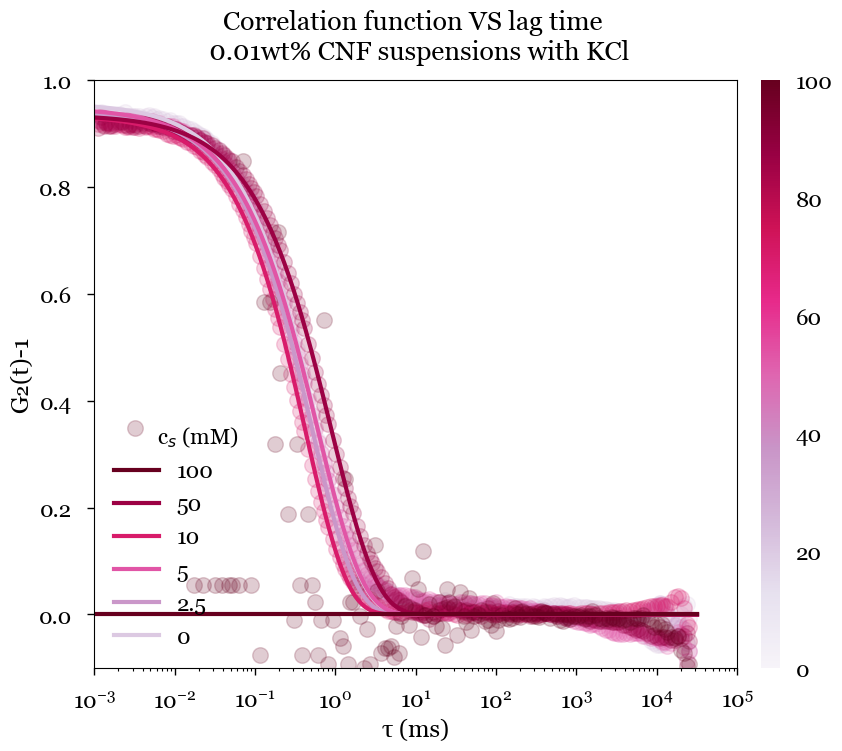

In [260]:
# Plot the fitting

t_fit_cnf001_110_150_0kcl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_0kcl = g(t_fit_cnf001_110_150_0kcl, A_fit_cnf001_110_150_0kcl, tau_fit_cnf001_110_150_0kcl, beta_fit_cnf001_110_150_0kcl)
t_fit_cnf001_110_150_025kcl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_025kcl = g(t_fit_cnf001_110_150_025kcl, A_fit_cnf001_110_150_025kcl, tau_fit_cnf001_110_150_025kcl, beta_fit_cnf001_110_150_025kcl)
t_fit_cnf001_110_150_050kcl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_050kcl = g(t_fit_cnf001_110_150_050kcl, A_fit_cnf001_110_150_050kcl, tau_fit_cnf001_110_150_050kcl, beta_fit_cnf001_110_150_050kcl)
t_fit_cnf001_110_150_100kcl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_100kcl = g(t_fit_cnf001_110_150_100kcl, A_fit_cnf001_110_150_100kcl, tau_fit_cnf001_110_150_100kcl, beta_fit_cnf001_110_150_100kcl)
t_fit_cnf001_110_150_500kcl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_500kcl = g(t_fit_cnf001_110_150_500kcl, A_fit_cnf001_110_150_500kcl, tau_fit_cnf001_110_150_500kcl, beta_fit_cnf001_110_150_500kcl)
t_fit_cnf001_110_150_1000kcl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_1000kcl = g(t_fit_cnf001_110_150_1000kcl, A_fit_cnf001_110_150_1000kcl, tau_fit_cnf001_110_150_1000kcl, beta_fit_cnf001_110_150_1000kcl)

t_fit_cnf001_110_150_kcl_all = [t_fit_cnf001_110_150_0kcl, t_fit_cnf001_110_150_025kcl, t_fit_cnf001_110_150_050kcl,
                            t_fit_cnf001_110_150_100kcl, t_fit_cnf001_110_150_500kcl, t_fit_cnf001_110_150_1000kcl]

g_fit_cnf001_110_150_kcl_all = [g_fit_cnf001_110_150_0kcl, g_fit_cnf001_110_150_025kcl, g_fit_cnf001_110_150_050kcl,
                            g_fit_cnf001_110_150_100kcl, g_fit_cnf001_110_150_500kcl, g_fit_cnf001_110_150_1000kcl]

#__________________________________________________________________________________________________
# Create a colormap
cmap_kcl = plt.get_cmap('PuRd')
start_index_licl = 1.2

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf001_110_150_kcl_all, t_fit_cnf001_110_150_kcl_all, g_cnf001_110_150_kcl_all, g_fit_cnf001_110_150_kcl_all, label_110_150, label_110_150)):
    c = cmap_kcl(float(idx + start_index_kcl) / len(t_cnf001_110_150_kcl_all))
    scatter1 = ax.scatter(x1, y1, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, alpha = 0.2)
    scatter2 = ax.semilogx(x2, y2,
                linestyle='solid', color = c, linewidth=3,  label=label2)

#__________________________________________________________________________________________________
# Add a colorbar that matches the colormap
salt_conc001_110_150_kcl_all = label_110_150 

# Calculate the overall minimum and maximum values for the colorbar
min_value = min(np.min(salt_conc001_110_150_kcl_all[i]) for i in range(len(salt_conc001_110_150_kcl_all)))
max_value = max(np.max(salt_conc001_110_150_kcl_all[i]) for i in range(len(salt_conc001_110_150_kcl_all)))

# Add a colorbar that matches the colormap and scales to the actual values
sm = plt.cm.ScalarMappable(cmap=cmap_kcl, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

# Create the colorbar with the actual value scale
cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)  # Adjust the pad and aspect values as per your preference
cbar.outline.set_visible(False)
#cbar.set_label('[NaCl] \n (mM)', rotation=0, labelpad=10)

#__________________________________________________________________________________________________
# Create the zoomed-inset axes with a different location
#ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper right')
# Plot the zoomed-in data
#for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf001_110_150, t_fit_cnf001_110_150_nacl, g_cnf001_110_150, g_fit_cnf001_110_150_nacl, label_110_150, label_110_150)):
#    c = cmap(float(idx) / len(t_cnf001_110_150))
#    scatter1_zoom = ax_zoom.scatter(x1, y1, c=np.atleast_2d(c), s = 400,
#                                    marker='o', facecolors=c, edgecolors=c, alpha=0.2, linewidths=3)
#    scatter2_zoom = ax_zoom.semilogx(x2, y2, linestyle='solid', color = c, linewidth=3)

# Specify the limits of the zoomed-in region
#x1, x2, y1, y2 = 1, 3, 0.3, 0.5
#ax_zoom.set_xlim(x1, x2)
#ax_zoom.set_ylim(y1, y2)
# Set the x-axis tick positions for the zoomed-in axes 
#ax_zoom.set_xscale('log')
#xticks = [1, 2, 3]
#yticks = [0.3,0.4,0.5]
#ax_zoom.set_xticks(xticks)
#ax_zoom.set_xticklabels(xticks)
#ax_zoom.set_yticks(yticks)
#ax_zoom.set_yticklabels(yticks)
#ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out')
#ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out')

# Create a mark for the zoomed-in region
#mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

#__________________________________________________________________________________________________
# Get the handles and labels of the legend items
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of the handles and labels
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed handles and labels
ax.legend(handles, labels, loc='lower left', frameon=False)

ax.text(6E-3, 0.32, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.01wt% CNF suspensions with KCl', pad=15)
#plt.savefig("Correlation function VS Scattering angle of 0.01CNF at 90deg fit zoom KCl.png", dpi=1500, bbox_inches='tight')
plt.show()

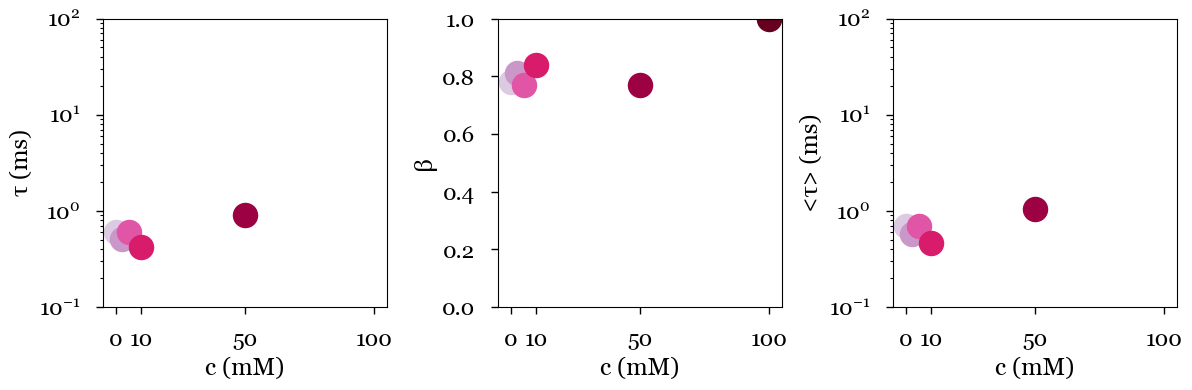

In [261]:
plt.style.use('_mpl-gallery-nogrid')
        
cmap_kcl = plt.get_cmap('PuRd')
start_index_kcl = 1.2

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_kcl_all, t_fitted_001CNF_110_150_KCl, label_110_150)):
    c = cmap_kcl(float(idx + start_index_kcl) / len(t_cnf001_110_150_kcl_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.1, 100)
axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_kcl_all, beta_fitted_001CNF_110_150_KCl, label_110_150)):
    c = cmap_kcl(float(idx + start_index_kcl) / len(t_cnf001_110_150_kcl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0,1)
axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[1].set_yscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_kcl_all, meantau_001CNF_110_150_kcl, label_110_150)):
    c = cmap_kcl(float(idx + start_index_licl) / len(t_cnf001_110_150_kcl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,100)
axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of KCl concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

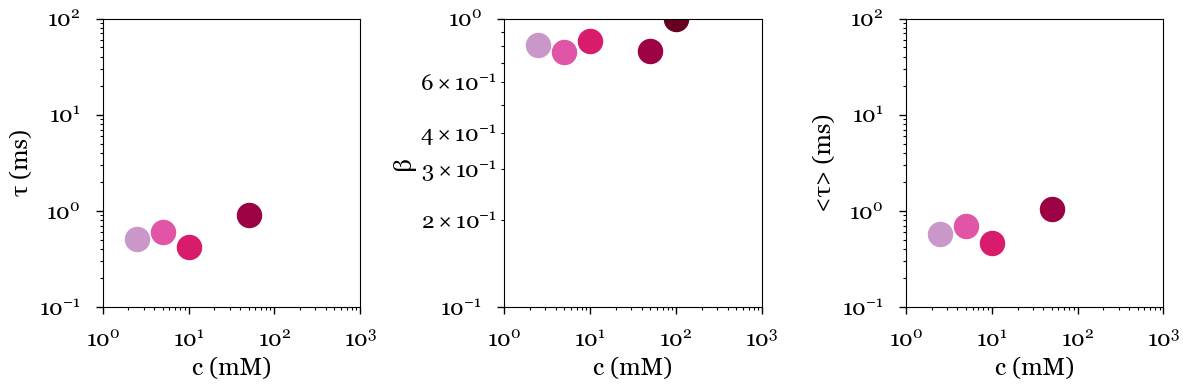

In [262]:
plt.style.use('_mpl-gallery-nogrid')

cmap_kcl = plt.get_cmap('PuRd')
start_index_nacl = 1.2

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_kcl_all, t_fitted_001CNF_110_150_KCl, label_110_150)):
    c = cmap_kcl(float(idx + start_index_kcl) / len(t_cnf001_110_150_kcl_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_xlim(1,1000)
axes[0].set_ylim(0.1,100)
axes[0].set_yscale("log")
#axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_kcl_all, beta_fitted_001CNF_110_150_KCl, label_110_150)):
    c = cmap_kcl(float(idx + start_index_kcl) / len(t_cnf001_110_150_kcl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1,1)
axes[1].set_xlim(1,1000)
#axes[1].set_xticks([0, 10, 50, 100])
axes[1].set_yticks([0.1,0.2, 0.3, 0.4, 0.5, 0.6, 1])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")
axes[1].set_xscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_kcl_all, meantau_001CNF_110_150_kcl, label_110_150)):
    c = cmap_kcl(float(idx + start_index_kcl) / len(t_cnf001_110_150_kcl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,100)
#axes[2].set_xticks([0, 10, 50, 100])
axes[2].set_xlim(1,1000)
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of NaCl concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto loglog.png", dpi=1500, bbox_inches='tight')
plt.show()

# RbCl

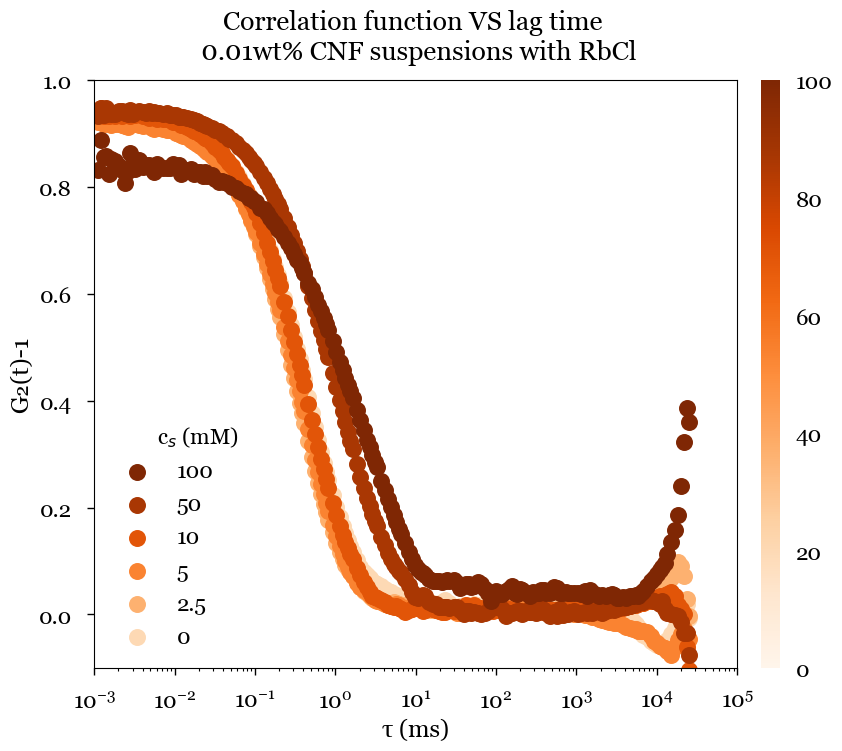

In [263]:
# Import Correlation Function data 
cnf001_110_150_025rbcl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/RbCl/0.01CNF(1.5mmol)_2.5mMRbCl/Measurement 5/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_050rbcl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/RbCl/0.01CNF(1.5mmol)_5mMRbCl/Measurement 5/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_100rbcl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/RbCl/0.01CNF(1.5mmol)_10mMRbCl/Measurement 5/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_500rbcl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/RbCl/0.01CNF(1.5mmol)_50mMRbCl/Measurement 5/Repetition2/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_1000rbcl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/RbCl/0.01CNF(1.5mmol)_100mMRbCl/Measurement 5/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf001_110_150_0rbcl = cnf001_110_150.iloc[28:,0]
lagtime_cnf001_110_150_0rbcl_ms = lagtime_cnf001_110_150_0rbcl*1000
corrfx_cnf001_110_150_0rbcl = cnf001_110_150.iloc[28:,1]

lagtime_cnf001_110_150_025rbcl = cnf001_110_150_025rbcl.iloc[28:,0]
lagtime_cnf001_110_150_025rbcl_ms = lagtime_cnf001_110_150_025rbcl*1000
corrfx_cnf001_110_150_025rbcl = cnf001_110_150_025rbcl.iloc[28:,1]

lagtime_cnf001_110_150_050rbcl = cnf001_110_150_050rbcl.iloc[28:,0]
lagtime_cnf001_110_150_050rbcl_ms = lagtime_cnf001_110_150_050rbcl*1000
corrfx_cnf001_110_150_050rbcl = cnf001_110_150_050rbcl.iloc[28:,1]

lagtime_cnf001_110_150_100rbcl = cnf001_110_150_100rbcl.iloc[28:,0]
lagtime_cnf001_110_150_100rbcl_ms = lagtime_cnf001_110_150_100rbcl*1000
corrfx_cnf001_110_150_100rbcl = cnf001_110_150_100rbcl.iloc[28:,1]

lagtime_cnf001_110_150_500rbcl = cnf001_110_150_500rbcl.iloc[28:,0]
lagtime_cnf001_110_150_500rbcl_ms = lagtime_cnf001_110_150_500rbcl*1000
corrfx_cnf001_110_150_500rbcl = cnf001_110_150_500rbcl.iloc[28:,1]

lagtime_cnf001_110_150_1000rbcl = cnf001_110_150_1000rbcl.iloc[28:,0]
lagtime_cnf001_110_150_1000rbcl_ms = lagtime_cnf001_110_150_1000rbcl*1000
corrfx_cnf001_110_150_1000rbcl = cnf001_110_150_1000rbcl.iloc[28:,1]

t_cnf001_110_150_rbcl_all = [lagtime_cnf001_110_150_0rbcl_ms, lagtime_cnf001_110_150_025rbcl_ms, lagtime_cnf001_110_150_050rbcl_ms,
                   lagtime_cnf001_110_150_100rbcl_ms, lagtime_cnf001_110_150_500rbcl_ms, lagtime_cnf001_110_150_1000rbcl_ms]
g_cnf001_110_150_rbcl_all = [corrfx_cnf001_110_150_0rbcl, corrfx_cnf001_110_150_025rbcl, corrfx_cnf001_110_150_050rbcl,
                   corrfx_cnf001_110_150_100rbcl, corrfx_cnf001_110_150_500rbcl, corrfx_cnf001_110_150_1000rbcl]
label_110_150 = [0, 2.5, 5, 10, 50, 100]
#label_110_150 = ['0mM NaCl', '2.5mM NaCl', '5mM NaCl',
#                '10mM NaCl', '50mM NaCl', '100mM NaCl']
#__________________________________________________________________________________________________
# Create a colormap
cmap_rbcl = plt.get_cmap('Oranges')
start_index_rbcl = 1.2

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x, y, label) in enumerate(zip(t_cnf001_110_150_rbcl_all, g_cnf001_110_150_rbcl_all, label_110_150)):
    c = cmap_rbcl(float(idx + start_index_rbcl) / len(t_cnf001_110_150_rbcl_all))
    scatter1 = ax.scatter(x, y, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
   # scatter1.set_facecolor('none')
#__________________________________________________________________________________________________

# Add a colorbar that matches the colormap
salt_conc001_110_150_rbcl_all = label_110_150

# Calculate the overall minimum and maximum values for the colorbar
min_value = min(np.min(salt_conc001_110_150_rbcl_all[i]) for i in range(len(salt_conc001_110_150_rbcl_all)))
max_value = max(np.max(salt_conc001_110_150_rbcl_all[i]) for i in range(len(salt_conc001_110_150_rbcl_all)))

# Add a colorbar that matches the colormap and scales to the actual values
sm = plt.cm.ScalarMappable(cmap=cmap_rbcl, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

# Create the colorbar with the actual value scale
cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)  # Adjust the pad and aspect values as per your preference
cbar.outline.set_visible(False)
#cbar.set_label('[NaCl] \n (mM)', rotation=0, labelpad=10)

#__________________________________________________________________________________________________
# Create the zoomed-inset axes with a different location
#ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper right')
# Plot the zoomed-in data
#for idx, (x, y) in enumerate(zip(t_cnf001_110_150_rbcl_all, g_cnf001_110_150_rbcl_all)):
#    c = cmap_rbcl(float(idx) / len(t_cnf001_110_150_rbcl_all))
#    scatter1_zoom = ax_zoom.scatter(x, y, c=np.atleast_2d(c), s = 300,
#                                    marker='o', facecolors=c, edgecolors=c, linewidths=3)
    #scatter1_zoom.set_facecolor('none')

# Specify the limits of the zoomed-in region
#x1, x2, y1, y2 = 1, 3, 0.3, 0.5
#ax_zoom.set_xlim(x1, x2)
#ax_zoom.set_ylim(y1, y2)

# Set the x-axis tick positions for the zoomed-in axes 
#ax_zoom.set_xscale('log')
#xticks = [1, 2, 3]
#yticks = [0.3,0.4,0.5]
#ax_zoom.set_xticks(xticks)
#ax_zoom.set_xticklabels(xticks)
#ax_zoom.set_yticks(yticks)
#ax_zoom.set_yticklabels(yticks)
#ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out')
#ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out')

# Create a mark for the zoomed-in region
#mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

#__________________________________________________________________________________________________
# Get the handles and labels of the legend items
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of the handles and labels
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed handles and labels
ax.legend(handles, labels, loc='lower left', frameon=False)

ax.text(6E-3, 0.32, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.01wt% CNF suspensions with RbCl', pad=15)
#plt.savefig("Correlation function VS lag time 0.01wt% CNF suspensions (1.50mmol COONa) at 90deg zoom RbCl.png", dpi=1500, bbox_inches='tight')
plt.show()

In [264]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf001_110_150_0rbcl = lagtime_cnf001_110_150_0rbcl_ms
g_t_cnf001_110_150_0rbcl = corrfx_cnf001_110_150_0rbcl
t_cnf001_110_150_025rbcl = lagtime_cnf001_110_150_025rbcl_ms
g_t_cnf001_110_150_025rbcl = corrfx_cnf001_110_150_025rbcl
t_cnf001_110_150_050rbcl = lagtime_cnf001_110_150_050rbcl_ms
g_t_cnf001_110_150_050rbcl = corrfx_cnf001_110_150_050rbcl
t_cnf001_110_150_100rbcl = lagtime_cnf001_110_150_100rbcl_ms
g_t_cnf001_110_150_100rbcl = corrfx_cnf001_110_150_100rbcl
t_cnf001_110_150_500rbcl = lagtime_cnf001_110_150_500rbcl_ms
g_t_cnf001_110_150_500rbcl = corrfx_cnf001_110_150_500rbcl
t_cnf001_110_150_1000rbcl = lagtime_cnf001_110_150_1000rbcl_ms
g_t_cnf001_110_150_1000rbcl = corrfx_cnf001_110_150_1000rbcl

p0 = [1, 1, 1]
# Set the parameter bounds
bounds = ([0, 0.0001, 0], [1, 10000, 1])

params_cnf001_110_150_0rbcl, cov_cnf001_110_150_0rbcl = curve_fit(g, t_cnf001_110_150_0rbcl, g_t_cnf001_110_150_0rbcl, p0, bounds=bounds)
A_fit_cnf001_110_150_0rbcl, tau_fit_cnf001_110_150_0rbcl, beta_fit_cnf001_110_150_0rbcl = params_cnf001_110_150_0rbcl

params_cnf001_110_150_025rbcl, cov_cnf001_110_150_025rbcl = curve_fit(g, t_cnf001_110_150_025rbcl, g_t_cnf001_110_150_025rbcl, p0, bounds=bounds)
A_fit_cnf001_110_150_025rbcl, tau_fit_cnf001_110_150_025rbcl, beta_fit_cnf001_110_150_025rbcl = params_cnf001_110_150_025rbcl

params_cnf001_110_150_050rbcl, cov_cnf001_110_150_050rbcl = curve_fit(g, t_cnf001_110_150_050rbcl, g_t_cnf001_110_150_050rbcl, p0, bounds=bounds)
A_fit_cnf001_110_150_050rbcl, tau_fit_cnf001_110_150_050rbcl, beta_fit_cnf001_110_150_050rbcl = params_cnf001_110_150_050rbcl

params_cnf001_110_150_100rbcl, cov_cnf001_110_150_100rbcl = curve_fit(g, t_cnf001_110_150_100rbcl, g_t_cnf001_110_150_100rbcl, p0, bounds=bounds)
A_fit_cnf001_110_150_100rbcl, tau_fit_cnf001_110_150_100rbcl, beta_fit_cnf001_110_150_100rbcl = params_cnf001_110_150_100rbcl

params_cnf001_110_150_500rbcl, cov_cnf001_110_150_500rbcl = curve_fit(g, t_cnf001_110_150_500rbcl, g_t_cnf001_110_150_500rbcl, p0, bounds=bounds)
A_fit_cnf001_110_150_500rbcl, tau_fit_cnf001_110_150_500rbcl, beta_fit_cnf001_110_150_500rbcl = params_cnf001_110_150_500rbcl

params_cnf001_110_150_1000rbcl, cov_cnf001_110_150_1000rbcl = curve_fit(g, t_cnf001_110_150_1000rbcl, g_t_cnf001_110_150_1000rbcl, p0, bounds=bounds)
A_fit_cnf001_110_150_1000rbcl, tau_fit_cnf001_110_150_1000rbcl, beta_fit_cnf001_110_150_1000rbcl = params_cnf001_110_150_1000rbcl

# Table using DataFrame
samples_001CNF_110_150_RbCl = ['0mM RbCl','2.5mM RbCl', '5mM RbCl', '10mM KCl', '50mM RbCl', '100mM RbCl']
A_fitted_001CNF_110_150_RbCl = [A_fit_cnf001_110_150_0rbcl, A_fit_cnf001_110_150_025rbcl, A_fit_cnf001_110_150_050rbcl, A_fit_cnf001_110_150_100rbcl, A_fit_cnf001_110_150_500rbcl, A_fit_cnf001_110_150_1000rbcl]
t_fitted_001CNF_110_150_RbCl = [tau_fit_cnf001_110_150_0rbcl, tau_fit_cnf001_110_150_025rbcl, tau_fit_cnf001_110_150_050rbcl, tau_fit_cnf001_110_150_100rbcl, tau_fit_cnf001_110_150_500rbcl, tau_fit_cnf001_110_150_1000rbcl]
beta_fitted_001CNF_110_150_RbCl =  [beta_fit_cnf001_110_150_0rbcl, beta_fit_cnf001_110_150_025rbcl, beta_fit_cnf001_110_150_050rbcl, beta_fit_cnf001_110_150_100rbcl, beta_fit_cnf001_110_150_500rbcl, beta_fit_cnf001_110_150_1000rbcl]

# mean tau calculations
meantau_cnf001s_110_150_rbcl = ["meantau_0.01wt.%CNF_0mMrbcl", "meantau_0.01wt.%CNF_2.5mMrbcl", "meantau_0.01wt.%CNF_5mMrbcl", "meantau_0.01wt.%CNF_10mMrbcl", "meantau_0.01wt.%CNF_50mMrbcl", "meantau_0.01wt.%CNF_100mMrbcl"]
meantau_cnf001s_110_150_rbcl_r = {}
for i in range(len(t_fitted_001CNF_110_150_RbCl)):
    meantau_cnf001_110_150_rbcl = (t_fitted_001CNF_110_150_RbCl[i]/beta_fitted_001CNF_110_150_RbCl[i])*scipy.special.gamma(1/beta_fitted_001CNF_110_150_RbCl[i])
    name = meantau_cnf001s_110_150_rbcl[i]
    meantau_cnf001s_110_150_rbcl_r[name] = meantau_cnf001_110_150_rbcl
    
meantau_001CNF_110_150_rbcl = np.array(list(meantau_cnf001s_110_150_rbcl_r.values()))

table_Parameters_001CNF_110_150_RbCl = {
    '0.01wt.%CNF with': samples_001CNF_110_150_RbCl ,
    'A' : A_fitted_001CNF_110_150_RbCl,
    '\u03C4 (ms)': t_fitted_001CNF_110_150_RbCl,
    '\u03B2': beta_fitted_001CNF_110_150_RbCl,
    '<\u03C4> (ms)': meantau_001CNF_110_150_rbcl
}

table_Parameters_001CNF_110_150_RbCl_draw = pd.DataFrame(table_Parameters_001CNF_110_150_RbCl)

styled_table_Parameters_001CNF_110_150_RbCl_draw = table_Parameters_001CNF_110_150_RbCl_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='Oranges') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.2f}', '\u03B2': '{:.3f}', '<\u03C4> (ms)': '{:.2f}'})\
    .hide(axis='index')

styled_table_Parameters_001CNF_110_150_RbCl_draw           

0.01wt.%CNF with,A,τ (ms),β,<τ> (ms)
0mM RbCl,0.957,0.60,0.781,0.69
2.5mM RbCl,0.949,0.44,0.831,0.49
5mM RbCl,0.936,0.48,0.834,0.53
10mM KCl,0.954,0.56,0.817,0.63
50mM RbCl,0.960,1.45,0.715,1.80
100mM RbCl,0.864,2.74,0.615,4.01


In [265]:
# Save the styled table to a html table 
html_styled_table_Parameters_001CNF_110_150_RbCl = 'styled_table_Parameters_001CNF_110_150_RbCl_draw.html'
styled_table_Parameters_001CNF_110_150_RbCl_draw.to_html(html_styled_table_Parameters_001CNF_110_150_RbCl)
#IPython.display.display(IPython.display.HTML(html_styled_table_Parameters_neatCNF))

# Convert the HTML file to an image/Save the htmal table to a png file
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 3,
   # 'width': 1200,  # A djust the width and height as needed
   # 'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}
image_table_Parameters_001CNF_110_150_RRbCl = 'Table Fitted Parameters 001wt.%CNF 1.50 mmol RbCl.png'
#imgkit.from_file(html_styled_table_Parameters_001CNF_110_150_RbCl, image_table_Parameters_001CNF_110_150_RbCl, options=options)

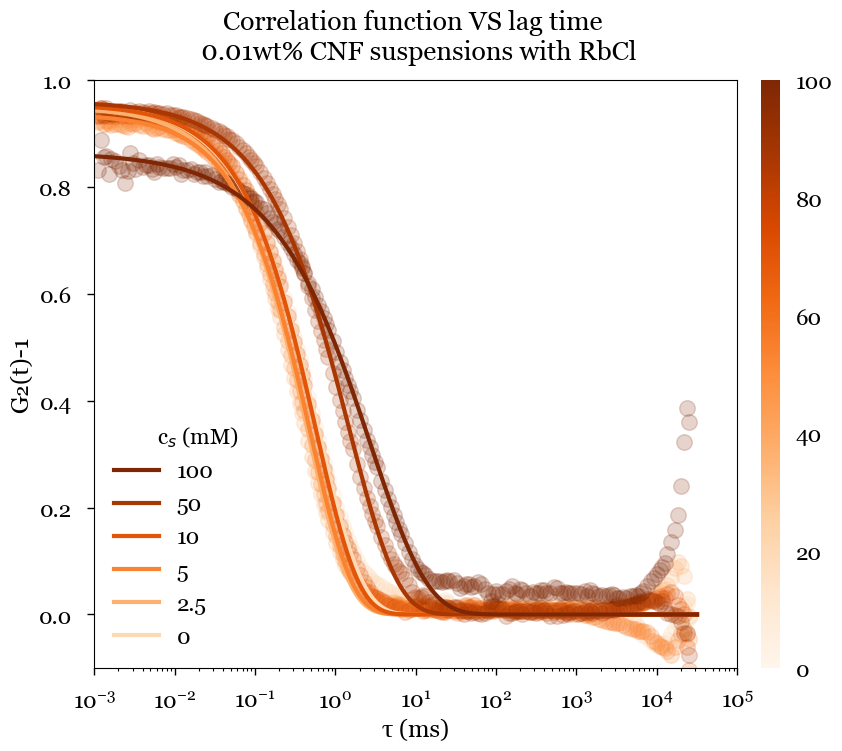

In [266]:
# Plot the fitting

t_fit_cnf001_110_150_0rbcl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_0rbcl = g(t_fit_cnf001_110_150_0rbcl, A_fit_cnf001_110_150_0rbcl, tau_fit_cnf001_110_150_0rbcl, beta_fit_cnf001_110_150_0rbcl)
t_fit_cnf001_110_150_025rbcl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_025rbcl = g(t_fit_cnf001_110_150_025rbcl, A_fit_cnf001_110_150_025rbcl, tau_fit_cnf001_110_150_025rbcl, beta_fit_cnf001_110_150_025rbcl)
t_fit_cnf001_110_150_050rbcl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_050rbcl = g(t_fit_cnf001_110_150_050rbcl, A_fit_cnf001_110_150_050rbcl, tau_fit_cnf001_110_150_050rbcl, beta_fit_cnf001_110_150_050rbcl)
t_fit_cnf001_110_150_100rbcl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_100rbcl = g(t_fit_cnf001_110_150_100rbcl, A_fit_cnf001_110_150_100rbcl, tau_fit_cnf001_110_150_100rbcl, beta_fit_cnf001_110_150_100rbcl)
t_fit_cnf001_110_150_500rbcl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_500rbcl = g(t_fit_cnf001_110_150_500rbcl, A_fit_cnf001_110_150_500rbcl, tau_fit_cnf001_110_150_500rbcl, beta_fit_cnf001_110_150_500rbcl)
t_fit_cnf001_110_150_1000rbcl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_1000rbcl = g(t_fit_cnf001_110_150_1000rbcl, A_fit_cnf001_110_150_1000rbcl, tau_fit_cnf001_110_150_1000rbcl, beta_fit_cnf001_110_150_1000rbcl)

t_fit_cnf001_110_150_rbcl_all = [t_fit_cnf001_110_150_0rbcl, t_fit_cnf001_110_150_025rbcl, t_fit_cnf001_110_150_050rbcl,
                            t_fit_cnf001_110_150_100rbcl, t_fit_cnf001_110_150_500rbcl, t_fit_cnf001_110_150_1000rbcl]

g_fit_cnf001_110_150_rbcl_all = [g_fit_cnf001_110_150_0rbcl, g_fit_cnf001_110_150_025rbcl, g_fit_cnf001_110_150_050rbcl,
                            g_fit_cnf001_110_150_100rbcl, g_fit_cnf001_110_150_500rbcl, g_fit_cnf001_110_150_1000rbcl]

#__________________________________________________________________________________________________
# Create a colormap
cmap_rbcl = plt.get_cmap('Oranges')
start_index_rbcl = 1.2

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf001_110_150_rbcl_all, t_fit_cnf001_110_150_rbcl_all, g_cnf001_110_150_rbcl_all, g_fit_cnf001_110_150_rbcl_all, label_110_150, label_110_150)):
    c = cmap_rbcl(float(idx + start_index_rbcl) / len(t_cnf001_110_150_rbcl_all))
    scatter1 = ax.scatter(x1, y1, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, alpha = 0.2)
    scatter2 = ax.semilogx(x2, y2,
                linestyle='solid', color = c, linewidth=3,  label=label2)

#__________________________________________________________________________________________________
# Add a colorbar that matches the colormap
salt_conc001_110_150_rbcl_all = label_110_150 

# Calculate the overall minimum and maximum values for the colorbar
min_value = min(np.min(salt_conc001_110_150_rbcl_all[i]) for i in range(len(salt_conc001_110_150_rbcl_all)))
max_value = max(np.max(salt_conc001_110_150_rbcl_all[i]) for i in range(len(salt_conc001_110_150_rbcl_all)))

# Add a colorbar that matches the colormap and scales to the actual values
sm = plt.cm.ScalarMappable(cmap=cmap_rbcl, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

# Create the colorbar with the actual value scale
cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)  # Adjust the pad and aspect values as per your preference
cbar.outline.set_visible(False)
#cbar.set_label('[NaCl] \n (mM)', rotation=0, labelpad=10)

#__________________________________________________________________________________________________
# Create the zoomed-inset axes with a different location
#ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper right')
# Plot the zoomed-in data
#for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf001_110_150, t_fit_cnf001_110_150_nacl, g_cnf001_110_150, g_fit_cnf001_110_150_nacl, label_110_150, label_110_150)):
#    c = cmap(float(idx) / len(t_cnf001_110_150))
#    scatter1_zoom = ax_zoom.scatter(x1, y1, c=np.atleast_2d(c), s = 400,
#                                    marker='o', facecolors=c, edgecolors=c, alpha=0.2, linewidths=3)
#    scatter2_zoom = ax_zoom.semilogx(x2, y2, linestyle='solid', color = c, linewidth=3)

# Specify the limits of the zoomed-in region
#x1, x2, y1, y2 = 1, 3, 0.3, 0.5
#ax_zoom.set_xlim(x1, x2)
#ax_zoom.set_ylim(y1, y2)
# Set the x-axis tick positions for the zoomed-in axes 
#ax_zoom.set_xscale('log')
#xticks = [1, 2, 3]
#yticks = [0.3,0.4,0.5]
#ax_zoom.set_xticks(xticks)
#ax_zoom.set_xticklabels(xticks)
#ax_zoom.set_yticks(yticks)
#ax_zoom.set_yticklabels(yticks)
#ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out')
#ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out')

# Create a mark for the zoomed-in region
#mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

#__________________________________________________________________________________________________
# Get the handles and labels of the legend items
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of the handles and labels
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed handles and labels
ax.legend(handles, labels, loc='lower left', frameon=False)

ax.text(6E-3, 0.32, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.01wt% CNF suspensions with RbCl', pad=15)
#plt.savefig("Correlation function VS Scattering angle of 0.01CNF at 90deg fit zoom RbCl.png", dpi=1500, bbox_inches='tight')
plt.show()

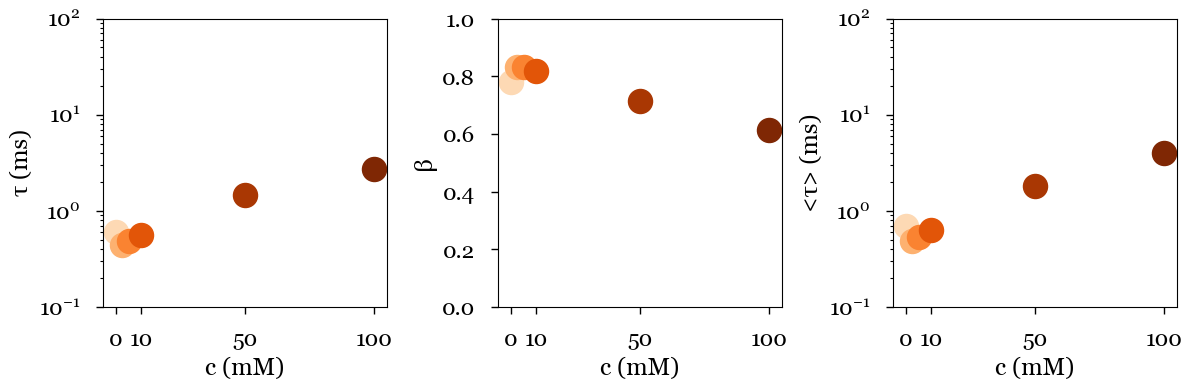

In [267]:
plt.style.use('_mpl-gallery-nogrid')
        
cmap_rbcl = plt.get_cmap('Oranges')
start_index_rbcl = 1.2

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_rbcl_all, t_fitted_001CNF_110_150_RbCl, label_110_150)):
    c = cmap_rbcl(float(idx + start_index_rbcl) / len(t_cnf001_110_150_rbcl_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.1, 100)
axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_rbcl_all, beta_fitted_001CNF_110_150_RbCl, label_110_150)):
    c = cmap_rbcl(float(idx + start_index_rbcl) / len(t_cnf001_110_150_rbcl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0,1)
axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[1].set_yscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_rbcl_all, meantau_001CNF_110_150_rbcl, label_110_150)):
    c = cmap_rbcl(float(idx + start_index_rbcl) / len(t_cnf001_110_150_rbcl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,100)
axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of RbCl concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

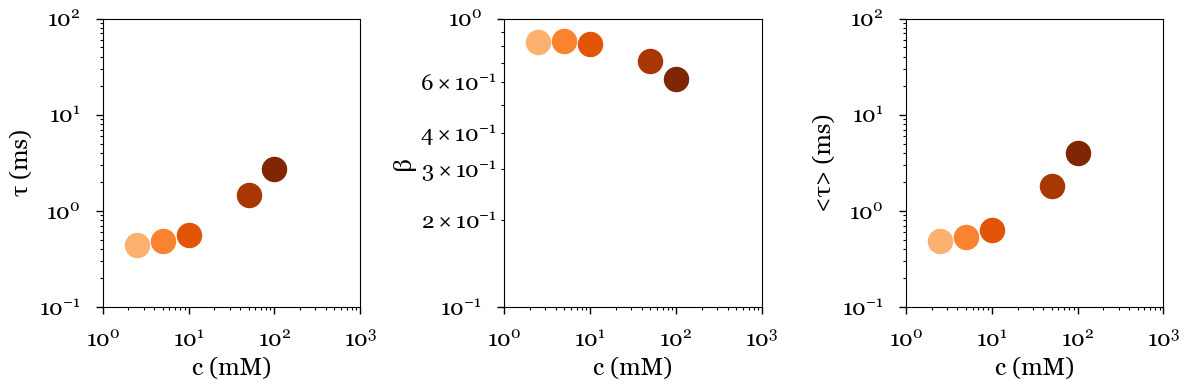

In [268]:
plt.style.use('_mpl-gallery-nogrid')

cmap_rbcl = plt.get_cmap('Oranges')
start_index_rbcl = 1.2

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_rbcl_all, t_fitted_001CNF_110_150_RbCl, label_110_150)):
    c = cmap_rbcl(float(idx + start_index_rbcl) / len(t_cnf001_110_150_rbcl_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_xlim(1,1000)
axes[0].set_ylim(0.1,100)
axes[0].set_yscale("log")
#axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_rbcl_all, beta_fitted_001CNF_110_150_RbCl, label_110_150)):
    c = cmap_rbcl(float(idx + start_index_rbcl) / len(t_cnf001_110_150_rbcl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1,1)
axes[1].set_xlim(1,1000)
#axes[1].set_xticks([0, 10, 50, 100])
axes[1].set_yticks([0.1,0.2, 0.3, 0.4, 0.5, 0.6, 1])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")
axes[1].set_xscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_rbcl_all, meantau_001CNF_110_150_rbcl, label_110_150)):
    c = cmap_rbcl(float(idx + start_index_rbcl) / len(t_cnf001_110_150_rbcl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,100)
#axes[2].set_xticks([0, 10, 50, 100])
axes[2].set_xlim(1,1000)
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of RbCl concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto loglog.png", dpi=1500, bbox_inches='tight')
plt.show()

# CsCl

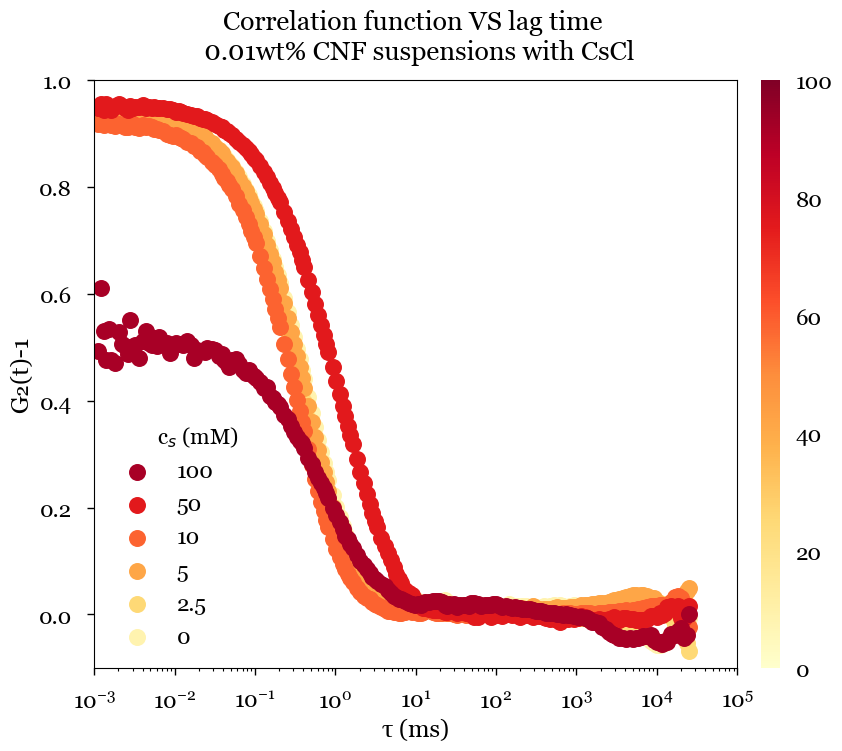

In [269]:
# Import Correlation Function data 
cnf001_110_150_025cscl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/CsCl/0.01CNF(1.5mmol)_2.5mMCsCl/Measurement 5/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_050cscl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/CsCl/0.01CNF(1.5mmol)_5mMCsCl/Measurement 5/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_100cscl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/CsCl/0.01CNF(1.5mmol)_10mMCsCl/Measurement 5/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_500cscl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/CsCl/0.01CNF(1.5mmol)_50mMCsCl/Measurement 5/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])
cnf001_110_150_1000cscl = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230901/CsCl/0.01CNF(1.5mmol)_100mMCsCl/Measurement 5/Repetition1/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime_cnf001_110_150_0cscl = cnf001_110_150.iloc[28:,0]
lagtime_cnf001_110_150_0cscl_ms = lagtime_cnf001_110_150_0cscl*1000
corrfx_cnf001_110_150_0cscl = cnf001_110_150.iloc[28:,1]

lagtime_cnf001_110_150_025cscl = cnf001_110_150_025cscl.iloc[28:,0]
lagtime_cnf001_110_150_025cscl_ms = lagtime_cnf001_110_150_025cscl*1000
corrfx_cnf001_110_150_025cscl = cnf001_110_150_025kcl.iloc[28:,1]

lagtime_cnf001_110_150_050cscl = cnf001_110_150_050cscl.iloc[28:,0]
lagtime_cnf001_110_150_050cscl_ms = lagtime_cnf001_110_150_050cscl*1000
corrfx_cnf001_110_150_050cscl = cnf001_110_150_050cscl.iloc[28:,1]

lagtime_cnf001_110_150_100cscl = cnf001_110_150_100cscl.iloc[28:,0]
lagtime_cnf001_110_150_100cscl_ms = lagtime_cnf001_110_150_100cscl*1000
corrfx_cnf001_110_150_100cscl = cnf001_110_150_100cscl.iloc[28:,1]

lagtime_cnf001_110_150_500cscl = cnf001_110_150_500cscl.iloc[28:,0]
lagtime_cnf001_110_150_500cscl_ms = lagtime_cnf001_110_150_500cscl*1000
corrfx_cnf001_110_150_500cscl = cnf001_110_150_500cscl.iloc[28:,1]

lagtime_cnf001_110_150_1000cscl = cnf001_110_150_1000cscl.iloc[28:,0]
lagtime_cnf001_110_150_1000cscl_ms = lagtime_cnf001_110_150_1000cscl*1000
corrfx_cnf001_110_150_1000cscl = cnf001_110_150_1000cscl.iloc[28:,1]

t_cnf001_110_150_cscl_all = [lagtime_cnf001_110_150_0cscl_ms, lagtime_cnf001_110_150_025cscl_ms, lagtime_cnf001_110_150_050cscl_ms,
                   lagtime_cnf001_110_150_100cscl_ms, lagtime_cnf001_110_150_500cscl_ms, lagtime_cnf001_110_150_1000cscl_ms]
g_cnf001_110_150_cscl_all = [corrfx_cnf001_110_150_0cscl, corrfx_cnf001_110_150_025cscl, corrfx_cnf001_110_150_050cscl,
                   corrfx_cnf001_110_150_100kcl, corrfx_cnf001_110_150_500cscl, corrfx_cnf001_110_150_1000cscl]
label_110_150 = [0, 2.5, 5, 10, 50, 100]
#label_110_150 = ['0mM NaCl', '2.5mM NaCl', '5mM NaCl',
#                '10mM NaCl', '50mM NaCl', '100mM NaCl']
#__________________________________________________________________________________________________
# Create a colormap
cmap_cscl = plt.get_cmap('YlOrRd')
start_index_cscl = 0.5

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x, y, label) in enumerate(zip(t_cnf001_110_150_cscl_all, g_cnf001_110_150_cscl_all, label_110_150)):
    c = cmap_cscl(float(idx + start_index_cscl) / len(t_cnf001_110_150_cscl_all))
    scatter1 = ax.scatter(x, y, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
   # scatter1.set_facecolor('none')
#__________________________________________________________________________________________________

# Add a colorbar that matches the colormap
salt_conc001_110_150_cscl_all = label_110_150

# Calculate the overall minimum and maximum values for the colorbar
min_value = min(np.min(salt_conc001_110_150_cscl_all[i]) for i in range(len(salt_conc001_110_150_cscl_all)))
max_value = max(np.max(salt_conc001_110_150_cscl_all[i]) for i in range(len(salt_conc001_110_150_cscl_all)))

# Add a colorbar that matches the colormap and scales to the actual values
sm = plt.cm.ScalarMappable(cmap=cmap_cscl, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

# Create the colorbar with the actual value scale
cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)  # Adjust the pad and aspect values as per your preference
cbar.outline.set_visible(False)
#cbar.set_label('[NaCl] \n (mM)', rotation=0, labelpad=10)

#__________________________________________________________________________________________________
# Create the zoomed-inset axes with a different location
#ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper right')
# Plot the zoomed-in data
#for idx, (x, y) in enumerate(zip(t_cnf001_110_150_kcl_all, g_cnf001_110_150_kcl_all)):
#    c = cmap_kcl(float(idx) / len(t_cnf001_110_150_kcl_all))
#    scatter1_zoom = ax_zoom.scatter(x, y, c=np.atleast_2d(c), s = 300,
#                                    marker='o', facecolors=c, edgecolors=c, linewidths=3)
    #scatter1_zoom.set_facecolor('none')

# Specify the limits of the zoomed-in region
#x1, x2, y1, y2 = 1, 3, 0.3, 0.5
#ax_zoom.set_xlim(x1, x2)
#ax_zoom.set_ylim(y1, y2)

# Set the x-axis tick positions for the zoomed-in axes 
#ax_zoom.set_xscale('log')
#xticks = [1, 2, 3]
#yticks = [0.3,0.4,0.5]
#ax_zoom.set_xticks(xticks)
#ax_zoom.set_xticklabels(xticks)
#ax_zoom.set_yticks(yticks)
#ax_zoom.set_yticklabels(yticks)
#ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out')
#ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out')

# Create a mark for the zoomed-in region
#mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

#__________________________________________________________________________________________________
# Get the handles and labels of the legend items
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of the handles and labels
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed handles and labels
ax.legend(handles, labels, loc='lower left', frameon=False)

ax.text(6E-3, 0.32, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.01wt% CNF suspensions with CsCl', pad=15)
#plt.savefig("Correlation function VS lag time 0.01wt% CNF suspensions (1.50mmol COONa) at 90deg zoom CsCl.png", dpi=1500, bbox_inches='tight')
plt.show()

In [270]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

t_cnf001_110_150_0cscl = lagtime_cnf001_110_150_0cscl_ms
g_t_cnf001_110_150_0cscl = corrfx_cnf001_110_150_0cscl
t_cnf001_110_150_025cscl = lagtime_cnf001_110_150_025cscl_ms
g_t_cnf001_110_150_025cscl = corrfx_cnf001_110_150_025cscl
t_cnf001_110_150_050cscl = lagtime_cnf001_110_150_050cscl_ms
g_t_cnf001_110_150_050cscl = corrfx_cnf001_110_150_050cscl
t_cnf001_110_150_100cscl = lagtime_cnf001_110_150_100cscl_ms
g_t_cnf001_110_150_100cscl = corrfx_cnf001_110_150_100cscl
t_cnf001_110_150_500cscl = lagtime_cnf001_110_150_500cscl_ms
g_t_cnf001_110_150_500cscl = corrfx_cnf001_110_150_500cscl
t_cnf001_110_150_1000cscl = lagtime_cnf001_110_150_1000cscl_ms
g_t_cnf001_110_150_1000cscl = corrfx_cnf001_110_150_1000cscl

p0 = [1, 1, 1]
# Set the parameter bounds
bounds = ([0, 0.0001, 0], [1, 10000, 1])

params_cnf001_110_150_0cscl, cov_cnf001_110_150_0cscl = curve_fit(g, t_cnf001_110_150_0cscl, g_t_cnf001_110_150_0cscl, p0, bounds=bounds)
A_fit_cnf001_110_150_0cscl, tau_fit_cnf001_110_150_0cscl, beta_fit_cnf001_110_150_0cscl = params_cnf001_110_150_0cscl

params_cnf001_110_150_025cscl, cov_cnf001_110_150_025cscl = curve_fit(g, t_cnf001_110_150_025cscl, g_t_cnf001_110_150_025cscl, p0, bounds=bounds)
A_fit_cnf001_110_150_025cscl, tau_fit_cnf001_110_150_025cscl, beta_fit_cnf001_110_150_025cscl = params_cnf001_110_150_025cscl

params_cnf001_110_150_050cscl, cov_cnf001_110_150_050cscl = curve_fit(g, t_cnf001_110_150_050cscl, g_t_cnf001_110_150_050cscl, p0, bounds=bounds)
A_fit_cnf001_110_150_050cscl, tau_fit_cnf001_110_150_050cscl, beta_fit_cnf001_110_150_050cscl = params_cnf001_110_150_050cscl

params_cnf001_110_150_100cscl, cov_cnf001_110_150_100cscl = curve_fit(g, t_cnf001_110_150_100cscl, g_t_cnf001_110_150_100cscl, p0, bounds=bounds)
A_fit_cnf001_110_150_100cscl, tau_fit_cnf001_110_150_100cscl, beta_fit_cnf001_110_150_100cscl = params_cnf001_110_150_100cscl

params_cnf001_110_150_500cscl, cov_cnf001_110_150_500cscl = curve_fit(g, t_cnf001_110_150_500cscl, g_t_cnf001_110_150_500cscl, p0, bounds=bounds)
A_fit_cnf001_110_150_500cscl, tau_fit_cnf001_110_150_500cscl, beta_fit_cnf001_110_150_500cscl = params_cnf001_110_150_500cscl

params_cnf001_110_150_1000cscl, cov_cnf001_110_150_1000cscl = curve_fit(g, t_cnf001_110_150_1000cscl, g_t_cnf001_110_150_1000cscl, p0, bounds=bounds)
A_fit_cnf001_110_150_1000cscl, tau_fit_cnf001_110_150_1000cscl, beta_fit_cnf001_110_150_1000cscl = params_cnf001_110_150_1000cscl

# Table using DataFrame
samples_001CNF_110_150_CsCl = ['0mM CsCl','2.5mM CsCl', '5mM CsCl', '10mM CsCl', '50mM CsCl', '100mM CsCl']
A_fitted_001CNF_110_150_CsCl = [A_fit_cnf001_110_150_0cscl, A_fit_cnf001_110_150_025cscl, A_fit_cnf001_110_150_050cscl, A_fit_cnf001_110_150_100cscl, A_fit_cnf001_110_150_500cscl, A_fit_cnf001_110_150_1000cscl]
t_fitted_001CNF_110_150_CsCl = [tau_fit_cnf001_110_150_0cscl, tau_fit_cnf001_110_150_025cscl, tau_fit_cnf001_110_150_050cscl, tau_fit_cnf001_110_150_100cscl, tau_fit_cnf001_110_150_500cscl, tau_fit_cnf001_110_150_1000cscl]
beta_fitted_001CNF_110_150_CsCl =  [beta_fit_cnf001_110_150_0cscl, beta_fit_cnf001_110_150_025cscl, beta_fit_cnf001_110_150_050cscl, beta_fit_cnf001_110_150_100cscl, beta_fit_cnf001_110_150_500cscl, beta_fit_cnf001_110_150_1000cscl]

# mean tau calculations
meantau_cnf001s_110_150_cscl = ["meantau_0.01wt.%CNF_0mMcscl", "meantau_0.01wt.%CNF_2.5mMcscl", "meantau_0.01wt.%CNF_5mMcscl", "meantau_0.01wt.%CNF_10mMcscl", "meantau_0.01wt.%CNF_50mMcscl", "meantau_0.01wt.%CNF_100mMcscl"]
meantau_cnf001s_110_150_cscl_r = {}
for i in range(len(t_fitted_001CNF_110_150_CsCl)):
    meantau_cnf001_110_150_cscl = (t_fitted_001CNF_110_150_CsCl[i]/beta_fitted_001CNF_110_150_CsCl[i])*scipy.special.gamma(1/beta_fitted_001CNF_110_150_CsCl[i])
    name = meantau_cnf001s_110_150_cscl[i]
    meantau_cnf001s_110_150_cscl_r[name] = meantau_cnf001_110_150_cscl
    
meantau_001CNF_110_150_cscl = np.array(list(meantau_cnf001s_110_150_cscl_r.values()))

table_Parameters_001CNF_110_150_CsCl = {
    '0.01wt.%CNF with': samples_001CNF_110_150_CsCl ,
    'A' : A_fitted_001CNF_110_150_CsCl,
    '\u03C4 (ms)': t_fitted_001CNF_110_150_CsCl,
    '\u03B2': beta_fitted_001CNF_110_150_CsCl,
    '<\u03C4> (ms)': meantau_001CNF_110_150_cscl
}

table_Parameters_001CNF_110_150_CsCl_draw = pd.DataFrame(table_Parameters_001CNF_110_150_CsCl)

styled_table_Parameters_001CNF_110_150_CsCl_draw = table_Parameters_001CNF_110_150_CsCl_draw.style \
    .set_properties(**{'font-family': 'Georgia','text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center'), ('font-family', 'Georgia')]}]) \
    .background_gradient(cmap='YlOrRd') \
    .format({'A': '{:.3f}', '\u03C4 (ms)': '{:.2f}', '\u03B2': '{:.3f}', '<\u03C4> (ms)': '{:.2f}'})\
    .hide(axis='index')

styled_table_Parameters_001CNF_110_150_CsCl_draw           

0.01wt.%CNF with,A,τ (ms),β,<τ> (ms)
0mM CsCl,0.957,0.60,0.781,0.69
2.5mM CsCl,0.942,0.51,0.812,0.58
5mM CsCl,0.954,0.55,0.820,0.61
10mM CsCl,0.952,0.48,0.856,0.52
50mM CsCl,0.966,1.47,0.736,1.77
100mM CsCl,0.524,1.04,0.715,1.29


In [271]:
# Save the styled table to a html table 
html_styled_table_Parameters_001CNF_110_150_CsCl = 'styled_table_Parameters_001CNF_110_150_CsCl_draw.html'
styled_table_Parameters_001CNF_110_150_CsCl_draw.to_html(html_styled_table_Parameters_001CNF_110_150_CsCl)
#IPython.display.display(IPython.display.HTML(html_styled_table_Parameters_neatCNF))

# Convert the HTML file to an image/Save the htmal table to a png file
options = {
    'format': 'png',
    'quiet': '',
    'enable-local-file-access': '',
    'quality': 100,
    'zoom': 3,
   # 'width': 1200,  # A djust the width and height as needed
   # 'height': 1200,
    'encoding': 'UTF-8',  # Specify the character encoding
}
image_table_Parameters_001CNF_110_150_CsCl = 'Table Fitted Parameters 001wt.%CNF 1.50 mmol CsCl.png'
#imgkit.from_file(html_styled_table_Parameters_001CNF_110_150_CsCl, image_table_Parameters_001CNF_110_150_CsCl, options=options)

True

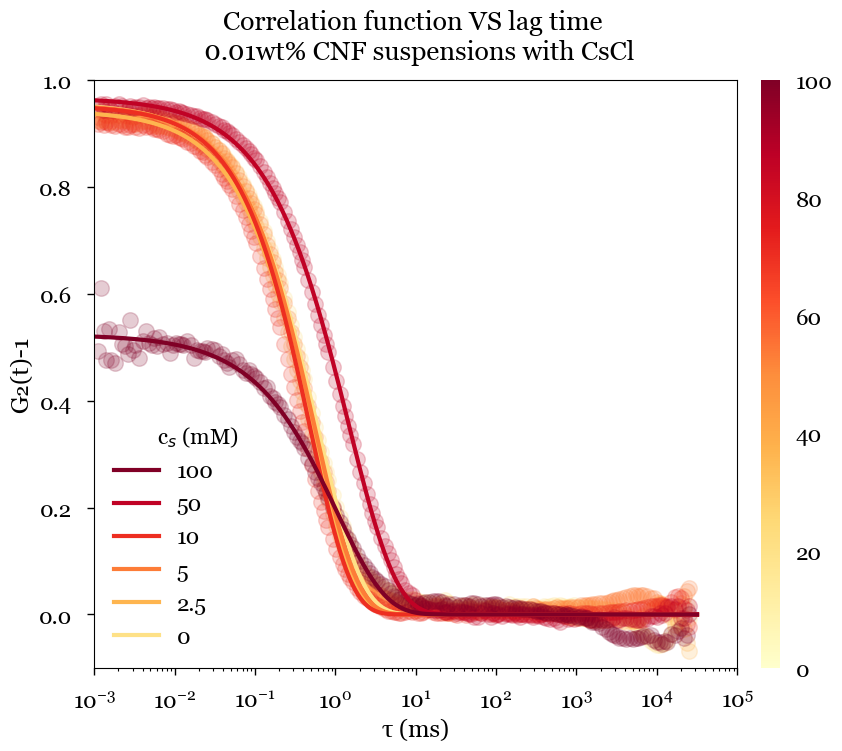

In [272]:
# Plot the fitting

t_fit_cnf001_110_150_0cscl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_0cscl = g(t_fit_cnf001_110_150_0cscl, A_fit_cnf001_110_150_0cscl, tau_fit_cnf001_110_150_0cscl, beta_fit_cnf001_110_150_0cscl)
t_fit_cnf001_110_150_025cscl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_025cscl = g(t_fit_cnf001_110_150_025cscl, A_fit_cnf001_110_150_025cscl, tau_fit_cnf001_110_150_025cscl, beta_fit_cnf001_110_150_025cscl)
t_fit_cnf001_110_150_050cscl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_050cscl = g(t_fit_cnf001_110_150_050cscl, A_fit_cnf001_110_150_050cscl, tau_fit_cnf001_110_150_050cscl, beta_fit_cnf001_110_150_050cscl)
t_fit_cnf001_110_150_100cscl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_100cscl = g(t_fit_cnf001_110_150_100cscl, A_fit_cnf001_110_150_100cscl, tau_fit_cnf001_110_150_100cscl, beta_fit_cnf001_110_150_100cscl)
t_fit_cnf001_110_150_500cscl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_500cscl = g(t_fit_cnf001_110_150_500cscl, A_fit_cnf001_110_150_500cscl, tau_fit_cnf001_110_150_500cscl, beta_fit_cnf001_110_150_500cscl)
t_fit_cnf001_110_150_1000cscl = np.logspace(-3, 4.5, 1000)
g_fit_cnf001_110_150_1000cscl = g(t_fit_cnf001_110_150_1000cscl, A_fit_cnf001_110_150_1000cscl, tau_fit_cnf001_110_150_1000cscl, beta_fit_cnf001_110_150_1000cscl)

t_fit_cnf001_110_150_cscl_all = [t_fit_cnf001_110_150_0cscl, t_fit_cnf001_110_150_025cscl, t_fit_cnf001_110_150_050cscl,
                            t_fit_cnf001_110_150_100cscl, t_fit_cnf001_110_150_500cscl, t_fit_cnf001_110_150_1000cscl]

g_fit_cnf001_110_150_cscl_all = [g_fit_cnf001_110_150_0cscl, g_fit_cnf001_110_150_025cscl, g_fit_cnf001_110_150_050cscl,
                            g_fit_cnf001_110_150_100cscl, g_fit_cnf001_110_150_500cscl, g_fit_cnf001_110_150_1000cscl]

#__________________________________________________________________________________________________
# Create a colormap
cmap_cscl = plt.get_cmap('YlOrRd')
start_index_cscl = 1.2

fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf001_110_150_cscl_all, t_fit_cnf001_110_150_cscl_all, g_cnf001_110_150_cscl_all, g_fit_cnf001_110_150_cscl_all, label_110_150, label_110_150)):
    c = cmap_cscl(float(idx + start_index_cscl) / len(t_cnf001_110_150_cscl_all))
    scatter1 = ax.scatter(x1, y1, c=np.atleast_2d(c),
                marker='o', facecolors=c, edgecolors=c, linewidths=1, alpha = 0.2)
    scatter2 = ax.semilogx(x2, y2,
                linestyle='solid', color = c, linewidth=3,  label=label2)

#__________________________________________________________________________________________________
# Add a colorbar that matches the colormap
salt_conc001_110_150_cscl_all = label_110_150 

# Calculate the overall minimum and maximum values for the colorbar
min_value = min(np.min(salt_conc001_110_150_cscl_all[i]) for i in range(len(salt_conc001_110_150_cscl_all)))
max_value = max(np.max(salt_conc001_110_150_cscl_all[i]) for i in range(len(salt_conc001_110_150_cscl_all)))

# Add a colorbar that matches the colormap and scales to the actual values
sm = plt.cm.ScalarMappable(cmap=cmap_cscl, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

# Create the colorbar with the actual value scale
cbar = plt.colorbar(sm, ax=ax, pad=0.03, aspect=30)  # Adjust the pad and aspect values as per your preference
cbar.outline.set_visible(False)
#cbar.set_label('[NaCl] \n (mM)', rotation=0, labelpad=10)

#__________________________________________________________________________________________________
# Create the zoomed-inset axes with a different location
#ax_zoom = zoomed_inset_axes(ax, zoom=3, loc='upper right')
# Plot the zoomed-in data
#for idx, (x1, x2, y1, y2, label1, label2) in enumerate(zip(t_cnf001_110_150, t_fit_cnf001_110_150_nacl, g_cnf001_110_150, g_fit_cnf001_110_150_nacl, label_110_150, label_110_150)):
#    c = cmap(float(idx) / len(t_cnf001_110_150))
#    scatter1_zoom = ax_zoom.scatter(x1, y1, c=np.atleast_2d(c), s = 400,
#                                    marker='o', facecolors=c, edgecolors=c, alpha=0.2, linewidths=3)
#    scatter2_zoom = ax_zoom.semilogx(x2, y2, linestyle='solid', color = c, linewidth=3)

# Specify the limits of the zoomed-in region
#x1, x2, y1, y2 = 1, 3, 0.3, 0.5
#ax_zoom.set_xlim(x1, x2)
#ax_zoom.set_ylim(y1, y2)
# Set the x-axis tick positions for the zoomed-in axes 
#ax_zoom.set_xscale('log')
#xticks = [1, 2, 3]
#yticks = [0.3,0.4,0.5]
#ax_zoom.set_xticks(xticks)
#ax_zoom.set_xticklabels(xticks)
#ax_zoom.set_yticks(yticks)
#ax_zoom.set_yticklabels(yticks)
#ax_zoom.tick_params(axis='x', length=5, width=1, color='black', direction='out')
#ax_zoom.tick_params(axis='y', length=5, width=1, color='black', direction='out')

# Create a mark for the zoomed-in region
#mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")

#__________________________________________________________________________________________________
# Get the handles and labels of the legend items
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of the handles and labels
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed handles and labels
ax.legend(handles, labels, loc='lower left', frameon=False)

ax.text(6E-3, 0.32, 'c$_s$ (mM)', fontsize=16, color='black')

plt.rcParams['font.family'] = 'Georgia'
plt.style.use('seaborn-poster')
ax.set_xlabel('\u03C4 (ms)')
ax.set_ylabel('G\u2082(t)-1')
ax.set_xscale("log")
ax.tick_params(axis='y', length=5, width=1, color='black', direction='out')
ax.tick_params(axis='x', length=5, width=1, color='black', direction='out')
ax.set_xlim(1E-3, 1E5)
ax.set_ylim(-0.1, 1)
ax.set_title('Correlation function VS lag time \n 0.01wt% CNF suspensions with CsCl', pad=15)
plt.savefig("Correlation function VS Scattering angle of 0.01CNF at 90deg fit zoom CsCl.png", dpi=1500, bbox_inches='tight')
plt.show()

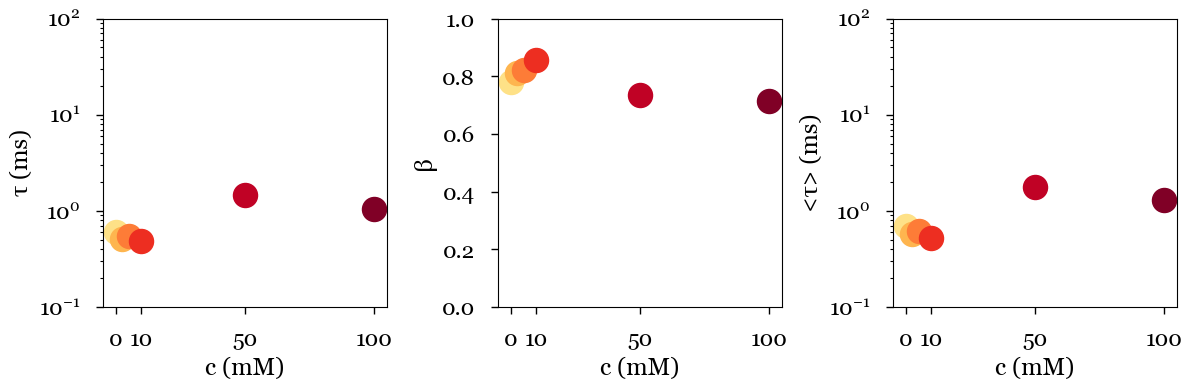

In [273]:
plt.style.use('_mpl-gallery-nogrid')
        
cmap_cscl = plt.get_cmap('YlOrRd')
start_index_cscl = 1.2

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_cscl_all, t_fitted_001CNF_110_150_CsCl, label_110_150)):
    c = cmap_cscl(float(idx + start_index_cscl) / len(t_cnf001_110_150_cscl_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.1, 100)
axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_cscl_all, beta_fitted_001CNF_110_150_CsCl, label_110_150)):
    c = cmap_cscl(float(idx + start_index_cscl) / len(t_cnf001_110_150_cscl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0,1)
axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[1].set_yscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_cscl_all, meantau_001CNF_110_150_cscl, label_110_150)):
    c = cmap_cscl(float(idx + start_index_cscl) / len(t_cnf001_110_150_cscl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,100)
axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of CsCl concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

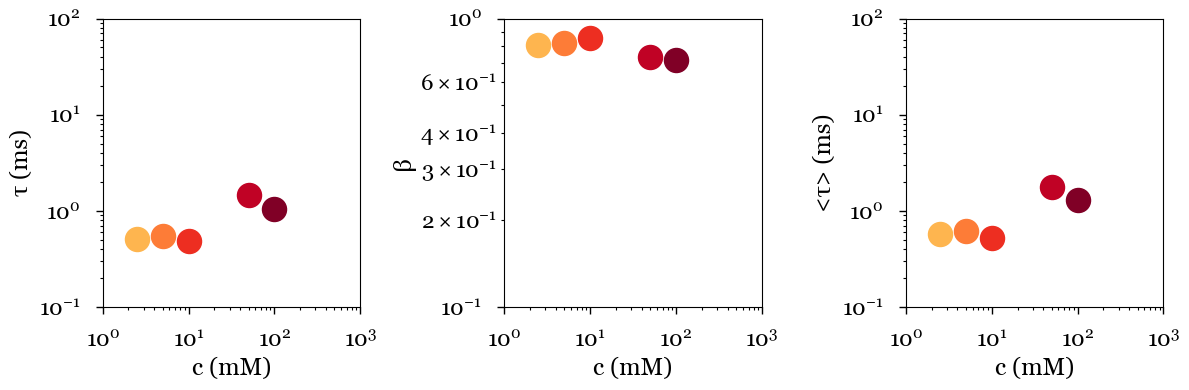

In [274]:
plt.style.use('_mpl-gallery-nogrid')

cmap_cscl = plt.get_cmap('YlOrRd')
start_index_cscl = 1.2

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_cscl_all, t_fitted_001CNF_110_150_CsCl, label_110_150)):
    c = cmap_cscl(float(idx + start_index_cscl) / len(t_cnf001_110_150_cscl_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_xlim(1,1000)
axes[0].set_ylim(0.1,100)
axes[0].set_yscale("log")
#axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_cscl_all, beta_fitted_001CNF_110_150_CsCl, label_110_150)):
    c = cmap_cscl(float(idx + start_index_cscl) / len(t_cnf001_110_150_cscl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1,1)
axes[1].set_xlim(1,1000)
#axes[1].set_xticks([0, 10, 50, 100])
axes[1].set_yticks([0.1,0.2, 0.3, 0.4, 0.5, 0.6, 1])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")
axes[1].set_xscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_cscl_all, meantau_001CNF_110_150_cscl, label_110_150)):
    c = cmap_cscl(float(idx + start_index_cscl) / len(t_cnf001_110_150_cscl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,100)
#axes[2].set_xticks([0, 10, 50, 100])
axes[2].set_xlim(1,1000)
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of CsCl concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto loglog.png", dpi=1500, bbox_inches='tight')
plt.show()

# All

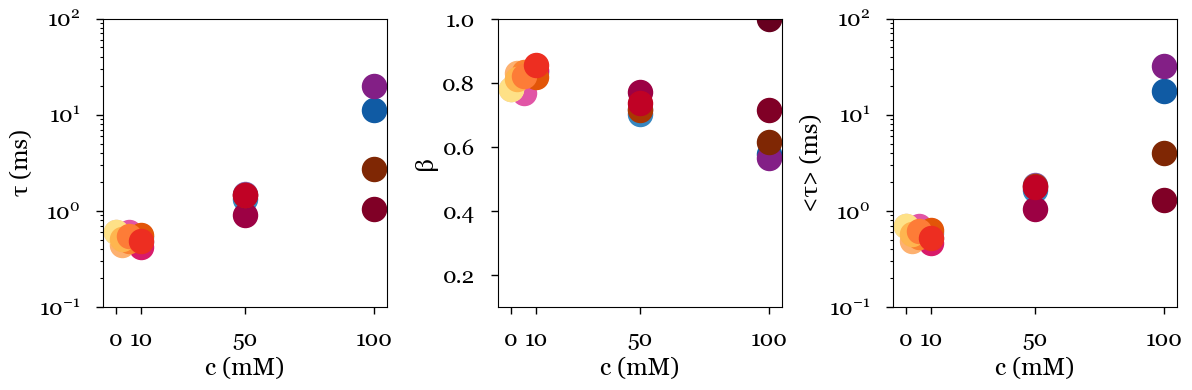

In [280]:
plt.style.use('_mpl-gallery-nogrid')
  
cmap_licl = plt.get_cmap('Blues')
cmap_nacl = plt.get_cmap('BuPu')
cmap_kcl = plt.get_cmap('PuRd')
cmap_rbcl = plt.get_cmap('Oranges')
cmap_cscl = plt.get_cmap('YlOrRd')
start_index_licl = 1.2
start_index_nacl = 1.2
start_index_kcl = 1.2
start_index_rbcl = 1.2
start_index_cscl = 1.2


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_licl_all, t_fitted_001CNF_110_150_LiCl, label_110_150)):
    c = cmap_licl(float(idx) / len(salt_conc001_110_150_licl_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150, t_fitted_001CNF_110_150_NaCl, label_110_150)):
    c = cmap_nacl(float(idx) / len(salt_conc001_110_150))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_kcl_all, t_fitted_001CNF_110_150_KCl, label_110_150)):
    c = cmap_kcl(float(idx + start_index_kcl) / len(t_cnf001_110_150_kcl_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_rbcl_all, t_fitted_001CNF_110_150_RbCl, label_110_150)):
    c = cmap_rbcl(float(idx + start_index_rbcl) / len(t_cnf001_110_150_rbcl_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_cscl_all, t_fitted_001CNF_110_150_CsCl, label_110_150)):
    c = cmap_cscl(float(idx + start_index_cscl) / len(t_cnf001_110_150_cscl_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.1,100)
axes[0].set_yscale("log")
axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_licl_all, beta_fitted_001CNF_110_150_LiCl, label_110_150)):
    c = cmap_licl(float(idx) / len(salt_conc001_110_150_licl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_nacl_all, beta_fitted_001CNF_110_150_NaCl, label_110_150)):
    c = cmap_nacl(float(idx) / len(salt_conc001_110_150_nacl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_kcl_all, beta_fitted_001CNF_110_150_KCl, label_110_150)):
    c = cmap_kcl(float(idx + start_index_kcl) / len(t_cnf001_110_150_kcl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_rbcl_all, beta_fitted_001CNF_110_150_RbCl, label_110_150)):
    c = cmap_rbcl(float(idx + start_index_rbcl) / len(t_cnf001_110_150_rbcl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_cscl_all, beta_fitted_001CNF_110_150_CsCl, label_110_150)):
    c = cmap_cscl(float(idx + start_index_cscl) / len(t_cnf001_110_150_cscl_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1,1)
axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[1].set_yscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_licl_all, meantau_001CNF_110_150_licl, label_110_150)):
    c = cmap_licl(float(idx) / len(salt_conc001_110_150_licl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_nacl_all, meantau_001CNF_110_150_nacl, label_110_150)):
    c = cmap_nacl(float(idx) / len(salt_conc001_110_150_nacl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_kcl_all, meantau_001CNF_110_150_kcl, label_110_150)):
    c = cmap_kcl(float(idx + start_index_kcl) / len(t_cnf001_110_150_kcl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_rbcl_all, meantau_001CNF_110_150_rbcl, label_110_150)):
    c = cmap_rbcl(float(idx + start_index_rbcl) / len(t_cnf001_110_150_rbcl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_cscl_all, meantau_001CNF_110_150_cscl, label_110_150)):
    c = cmap_cscl(float(idx + start_index_cscl) / len(t_cnf001_110_150_cscl_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,100)
axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of Chloride salt concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

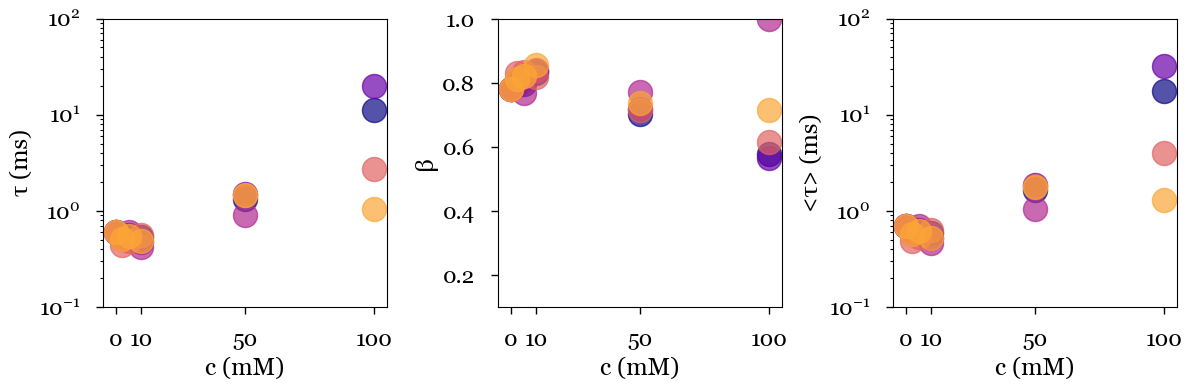

In [310]:
plt.style.use('_mpl-gallery-nogrid')

salt_conc001_110_150_mono_all = [salt_conc001_110_150_licl_all, salt_conc001_110_150_nacl_all, salt_conc001_110_150_kcl_all,
                                salt_conc001_110_150_rbcl_all, salt_conc001_110_150_cscl_all]
t_fitted_001CNF_110_150_mono = [t_fitted_001CNF_110_150_LiCl, t_fitted_001CNF_110_150_NaCl, t_fitted_001CNF_110_150_KCl,
                               t_fitted_001CNF_110_150_RbCl, t_fitted_001CNF_110_150_CsCl]
beta_fitted_001CNF_110_150_mono = [beta_fitted_001CNF_110_150_LiCl, beta_fitted_001CNF_110_150_NaCl, beta_fitted_001CNF_110_150_KCl,
                                  beta_fitted_001CNF_110_150_RbCl, beta_fitted_001CNF_110_150_CsCl]
meantau_001CNF_110_150_mono = [meantau_001CNF_110_150_licl, meantau_001CNF_110_150_nacl, meantau_001CNF_110_150_kcl,
                              meantau_001CNF_110_150_rbcl, meantau_001CNF_110_150_cscl]
label_mono = ['Li','Na','K','Rb','Cs']
cmap_mono = plt.get_cmap('plasma')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_mono_all, t_fitted_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300, alpha = 0.7,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.1,100)
axes[0].set_yscale("log")
axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_mono_all, beta_fitted_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,alpha = 0.7,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1,1)
axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[1].set_yscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_mono_all, meantau_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,alpha = 0.7,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,100)
axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of Chloride salt concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

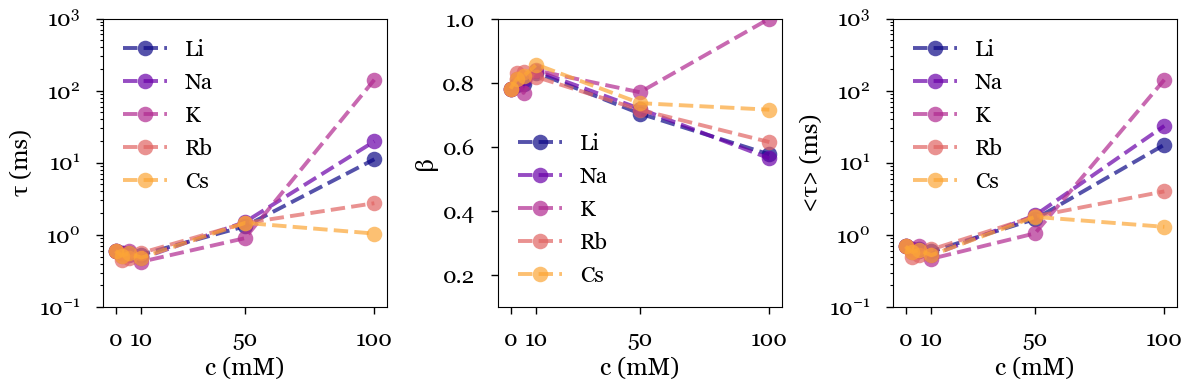

In [328]:
plt.style.use('_mpl-gallery-nogrid')

salt_conc001_110_150_mono_all = [salt_conc001_110_150_licl_all, salt_conc001_110_150_nacl_all, salt_conc001_110_150_kcl_all,
                                salt_conc001_110_150_rbcl_all, salt_conc001_110_150_cscl_all]
t_fitted_001CNF_110_150_mono = [t_fitted_001CNF_110_150_LiCl, t_fitted_001CNF_110_150_NaCl, t_fitted_001CNF_110_150_KCl,
                               t_fitted_001CNF_110_150_RbCl, t_fitted_001CNF_110_150_CsCl]
beta_fitted_001CNF_110_150_mono = [beta_fitted_001CNF_110_150_LiCl, beta_fitted_001CNF_110_150_NaCl, beta_fitted_001CNF_110_150_KCl,
                                  beta_fitted_001CNF_110_150_RbCl, beta_fitted_001CNF_110_150_CsCl]
meantau_001CNF_110_150_mono = [meantau_001CNF_110_150_licl, meantau_001CNF_110_150_nacl, meantau_001CNF_110_150_kcl,
                              meantau_001CNF_110_150_rbcl, meantau_001CNF_110_150_cscl]
label_mono = ['Li','Na','K','Rb','Cs']
cmap_mono = plt.get_cmap('plasma')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_mono_all, t_fitted_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    #scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=100, alpha = 0.7,
    #            marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
    axes[0].plot(x1, y1, color=c, marker='o', alpha = 0.7,linestyle='dashed', label=label)


axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.1,1000)
axes[0].set_yscale("log")
axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[0].legend(frameon = False)

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_mono_all, beta_fitted_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    #scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=100,  alpha = 0.7,
    #            marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
    axes[1].plot(x2, y2, color=c, marker='o', alpha = 0.7,linestyle='dashed', label=label)


axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1,1)
axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[1].set_yscale("log")
axes[1].legend(frameon = False)

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_mono_all, meantau_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    #scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=100,  alpha = 0.7,
    #            marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)
    axes[2].plot(x3, y3, color=c, marker='o', alpha = 0.7,linestyle='dashed', label=label)

axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,1000)
axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[2].set_xscale("log")
axes[2].set_yscale("log")
axes[2].legend(frameon = False)


plt.tight_layout()
plt.savefig("Parameters as functions of Chloride salt concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

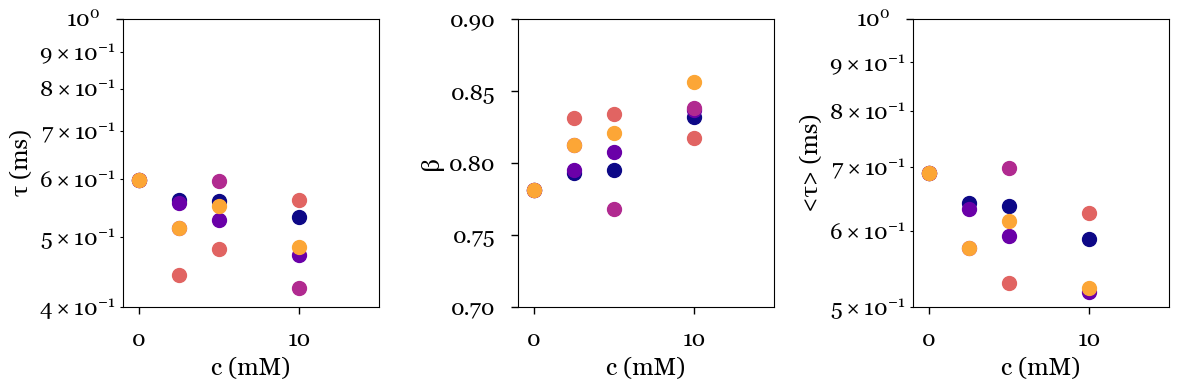

In [307]:
plt.style.use('_mpl-gallery-nogrid')

salt_conc001_110_150_mono_all = [salt_conc001_110_150_licl_all, salt_conc001_110_150_nacl_all, salt_conc001_110_150_kcl_all,
                                salt_conc001_110_150_rbcl_all, salt_conc001_110_150_cscl_all]
t_fitted_001CNF_110_150_mono = [t_fitted_001CNF_110_150_LiCl, t_fitted_001CNF_110_150_NaCl, t_fitted_001CNF_110_150_KCl,
                               t_fitted_001CNF_110_150_RbCl, t_fitted_001CNF_110_150_CsCl]
beta_fitted_001CNF_110_150_mono = [beta_fitted_001CNF_110_150_LiCl, beta_fitted_001CNF_110_150_NaCl, beta_fitted_001CNF_110_150_KCl,
                                  beta_fitted_001CNF_110_150_RbCl, beta_fitted_001CNF_110_150_CsCl]
meantau_001CNF_110_150_mono = [meantau_001CNF_110_150_licl, meantau_001CNF_110_150_nacl, meantau_001CNF_110_150_kcl,
                              meantau_001CNF_110_150_rbcl, meantau_001CNF_110_150_cscl]
label_mono = ['Li','Na','K','Rb','Cs']
cmap_mono = plt.get_cmap('plasma')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_mono_all, t_fitted_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=100,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.4,1)
axes[0].set_xlim(-1,15)
axes[0].set_yscale("log")
#axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_mono_all, beta_fitted_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=100,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.7,0.9)
axes[1].set_xlim(-1,15)
#axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[1].set_yscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_mono_all, meantau_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=100,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.5,1)
axes[2].set_xlim(-1,15)
#axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
#axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of Chloride salt concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

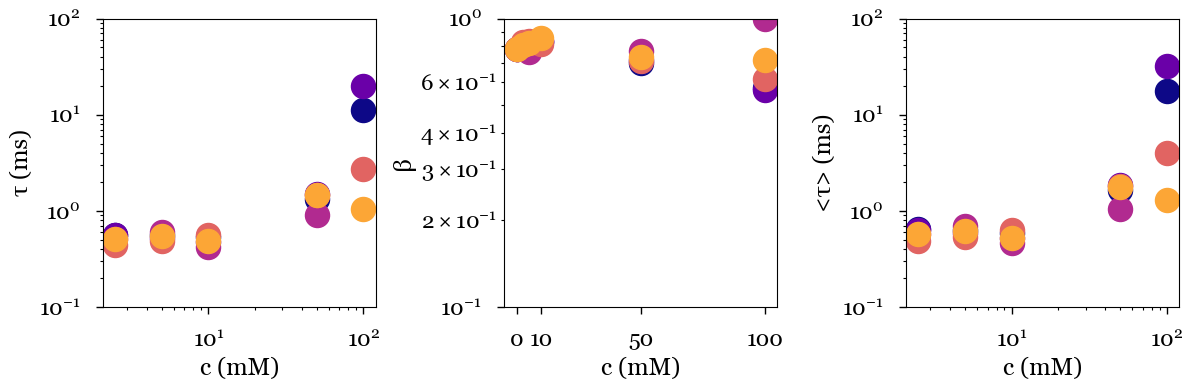

In [283]:
plt.style.use('_mpl-gallery-nogrid')

salt_conc001_110_150_mono_all = [salt_conc001_110_150_licl_all, salt_conc001_110_150_nacl_all, salt_conc001_110_150_kcl_all,
                                salt_conc001_110_150_rbcl_all, salt_conc001_110_150_cscl_all]
t_fitted_001CNF_110_150_mono = [t_fitted_001CNF_110_150_LiCl, t_fitted_001CNF_110_150_NaCl, t_fitted_001CNF_110_150_KCl,
                               t_fitted_001CNF_110_150_RbCl, t_fitted_001CNF_110_150_CsCl]
beta_fitted_001CNF_110_150_mono = [beta_fitted_001CNF_110_150_LiCl, beta_fitted_001CNF_110_150_NaCl, beta_fitted_001CNF_110_150_KCl,
                                  beta_fitted_001CNF_110_150_RbCl, beta_fitted_001CNF_110_150_CsCl]
meantau_001CNF_110_150_mono = [meantau_001CNF_110_150_licl, meantau_001CNF_110_150_nacl, meantau_001CNF_110_150_kcl,
                              meantau_001CNF_110_150_rbcl, meantau_001CNF_110_150_cscl]
label_mono = ['Li','Na','K','Rb','Cs']
cmap_mono = plt.get_cmap('plasma')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_mono_all, t_fitted_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.1,100)
axes[0].set_yscale("log")
axes[0].set_xscale("log")
#axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_mono_all, beta_fitted_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.1,1)
axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_mono_all, meantau_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.1,100)
axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of Chloride salt concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()

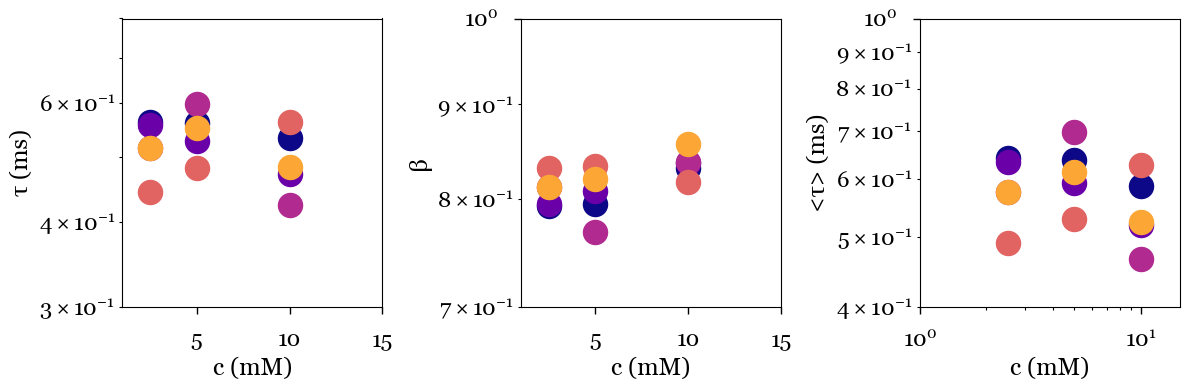

In [298]:
plt.style.use('_mpl-gallery-nogrid')

salt_conc001_110_150_mono_all = [salt_conc001_110_150_licl_all, salt_conc001_110_150_nacl_all, salt_conc001_110_150_kcl_all,
                                salt_conc001_110_150_rbcl_all, salt_conc001_110_150_cscl_all]
t_fitted_001CNF_110_150_mono = [t_fitted_001CNF_110_150_LiCl, t_fitted_001CNF_110_150_NaCl, t_fitted_001CNF_110_150_KCl,
                               t_fitted_001CNF_110_150_RbCl, t_fitted_001CNF_110_150_CsCl]
beta_fitted_001CNF_110_150_mono = [beta_fitted_001CNF_110_150_LiCl, beta_fitted_001CNF_110_150_NaCl, beta_fitted_001CNF_110_150_KCl,
                                  beta_fitted_001CNF_110_150_RbCl, beta_fitted_001CNF_110_150_CsCl]
meantau_001CNF_110_150_mono = [meantau_001CNF_110_150_licl, meantau_001CNF_110_150_nacl, meantau_001CNF_110_150_kcl,
                              meantau_001CNF_110_150_rbcl, meantau_001CNF_110_150_cscl]
label_mono = ['Li','Na','K','Rb','Cs']
cmap_mono = plt.get_cmap('plasma')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the data
for idx, (x1, y1, label) in enumerate(zip(salt_conc001_110_150_mono_all, t_fitted_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    scatter1 = axes[0].scatter(x1, y1, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[0].set_xlabel('c (mM)')
axes[0].set_ylabel('\u03C4 (ms)')
axes[0].set_yscale("log")
axes[0].set_ylim(0.3,0.8)
axes[0].set_xlim(1,15)
axes[0].set_yscale("log")
#axes[0].set_xscale("log")
#axes[0].set_xticks([0, 10, 50, 100])
axes[0].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[0].tick_params(axis='x', length=5, width=1, color='black', direction='out')

for idx, (x2, y2, label) in enumerate(zip(salt_conc001_110_150_mono_all, beta_fitted_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    scatter2 = axes[1].scatter(x2, y2, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[1].set_xlabel('c (mM)')
axes[1].set_ylabel('\u03B2')
axes[1].set_ylim(0.7,1)
axes[1].set_xlim(1,15)
#axes[1].set_xticks([0, 10, 50, 100])
axes[1].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[1].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[1].set_yscale("log")
#axes[1].set_xscale("log")

for idx, (x3, y3, label) in enumerate(zip(salt_conc001_110_150_mono_all, meantau_001CNF_110_150_mono, label_mono)):
    c = cmap_mono(float(idx) / len(salt_conc001_110_150_mono_all))
    scatter3 = axes[2].scatter(x3, y3, c=np.atleast_2d(c), s=300,
                marker='o', facecolors=c, edgecolors=c, linewidths=1, label=label)

axes[2].set_xlabel('c (mM)')
axes[2].set_ylabel('<\u03C4> (ms)')
axes[2].set_ylim(0.4,1)
axes[2].set_xlim(1,15)
#axes[2].set_xticks([0, 10, 50, 100])
axes[2].tick_params(axis='y', length=5, width=1, color='black', direction='out')
axes[2].tick_params(axis='x', length=5, width=1, color='black', direction='out')
axes[2].set_xscale("log")
axes[2].set_yscale("log")

plt.tight_layout()
#plt.savefig("Parameters as functions of Chloride salt concentrations 0.01wt.%CNF (1.50 mmol) at 90\u00b0 2D Auto.png", dpi=1500, bbox_inches='tight')
plt.show()